<a href="https://colab.research.google.com/github/Imran012x/Hilsha_CoLab/blob/main/1_CNN%2Btransfer_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Co-Lab -->> Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# from google.colab import files

# # Upload a file
# uploaded = files.upload()

# # Get the file name
# file_name = list(uploaded.keys())[0]
# print(f"Uploaded file: {file_name}")


#Data Preprocessing

In [4]:
import zipfile
import os

with zipfile.ZipFile('/content/drive/MyDrive/data_fish_224_12k.zip', 'r') as zip_ref:
    zip_ref.extractall('')

In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from PIL import Image
from sklearn.model_selection import train_test_split

In [6]:
ilish_pic= os.listdir('/content/ilish/')
print(ilish_pic[0:5])
print(ilish_pic[-5:])
chandana_pic= os.listdir('/content/chandana/')
sardin_pic= os.listdir('/content/sardin/')
sardinella_pic= os.listdir('/content/sardinella/')
punctatus_pic= os.listdir('/content/punctatus/')

['977.webp', '327.webp', '1246.webp', '2809.webp', '2231.webp']
['1294.webp', '875.webp', '2973.webp', '1250.webp', '487.webp']


In [7]:
print('ilish   images:', len(ilish_pic))
print('chandana  images:', len(chandana_pic))
print('sardin   images:', len(sardin_pic))
print('sardinella  images:', len(sardinella_pic))
print('punctatus images:', len(sardinella_pic))

ilish   images: 3000
chandana  images: 2000
sardin   images: 3000
sardinella  images: 2000
punctatus images: 2000


In [8]:
ilish_pic_labels = [0]*len(ilish_pic)
chandana_pic_labels = [1]*len(chandana_pic)
sardin_pic_labels = [2]*len(sardin_pic)
sardinella_pic_labels = [3]*len(sardinella_pic)
punctatus_pic_labels = [4]*len(punctatus_pic)


print(ilish_pic_labels[0:5])

print(chandana_pic_labels[0:5])

print(sardin_pic_labels[0:5])

print(sardinella_pic_labels[0:5])

print(punctatus_pic_labels[0:5])

[0, 0, 0, 0, 0]
[1, 1, 1, 1, 1]
[2, 2, 2, 2, 2]
[3, 3, 3, 3, 3]
[4, 4, 4, 4, 4]


In [9]:
labels = ilish_pic_labels + chandana_pic_labels + sardin_pic_labels + sardinella_pic_labels + punctatus_pic_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

12000
[0, 0, 0, 0, 0]
[4, 4, 4, 4, 4]


In [10]:
import random
import os
from PIL import Image
import numpy as np

# Parameters (set different numbers for each class)
ilish_image_number = len(ilish_pic)
chandana_image_number = len(chandana_pic)
sardin_image_number = len(sardin_pic)
sardinella_image_number = len(sardinella_pic)
punctatus_image_number = len(punctatus_pic)


# Initialize the list to store the images
data = []

def process_images(image_path, image_number):
    image_labels = sorted(os.listdir(image_path))  # Ensure images are in order
    random.shuffle(image_labels)  # Shuffle to get random ones
    selected_images = []
    for img_file in image_labels[:image_number]:
        image = Image.open(os.path.join(image_path, img_file))
        image = image.resize((224, 224))
        image = image.convert('RGB')
        image = np.array(image)
        selected_images.append(image)
    return selected_images

# Process images for each category
data.extend(process_images('/content/ilish/', ilish_image_number))
data.extend(process_images('/content/chandana/', chandana_image_number))
data.extend(process_images('/content/sardin/', sardin_image_number))
data.extend(process_images('/content/sardinella/', sardinella_image_number))
data.extend(process_images('/content/punctatus/', punctatus_image_number))

In [11]:
# Convert labels to numpy array for easy processing
labels = np.array(labels)

# Count the number of images in each class
unique, counts = np.unique(labels, return_counts=True)

# Print the number of images for each class
class_counts = dict(zip(unique, counts))
print(f"Class counts: {class_counts}")
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)
print(X.shape)
print(Y.shape)

Class counts: {0: 3000, 1: 2000, 2: 3000, 3: 2000, 4: 2000}
(12000, 224, 224, 3)
(12000,)


(12000, 224, 224, 3) (9600, 224, 224, 3) (2400, 224, 224, 3)


array([[[156, 160, 176],
        [156, 160, 176],
        [158, 162, 179],
        ...,
        [161, 168, 182],
        [159, 166, 177],
        [157, 165, 176]],

       [[161, 164, 182],
        [161, 164, 182],
        [158, 162, 179],
        ...,
        [165, 172, 185],
        [164, 172, 183],
        [158, 165, 178]],

       [[154, 160, 179],
        [156, 159, 179],
        [159, 163, 180],
        ...,
        [168, 175, 189],
        [167, 174, 186],
        [157, 164, 177]],

       ...,

       [[130, 136, 154],
        [129, 135, 153],
        [130, 136, 155],
        ...,
        [151, 158, 171],
        [151, 157, 171],
        [148, 155, 169]],

       [[109, 116, 134],
        [115, 121, 139],
        [116, 122, 140],
        ...,
        [157, 164, 177],
        [144, 151, 164],
        [147, 154, 168]],

       [[124, 132, 150],
        [121, 130, 147],
        [123, 132, 149],
        ...,
        [147, 154, 168],
        [148, 155, 169],
        [147, 154, 168]]], dtype=uint8)
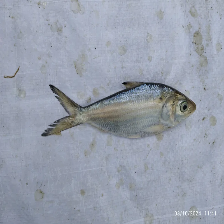

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)
print(X.shape, X_train.shape, X_test.shape)
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

X_train[0]

#Optuna-Hyper parameter Training

In [12]:
# !pip install optuna
# import optuna
# import numpy as np
# import matplotlib.pyplot as plt
# import tensorflow as tf
# from tensorflow.keras.applications import ResNet50
# from tensorflow.keras.models import Model
# from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, GlobalAveragePooling2D
# from tensorflow.keras.optimizers import RMSprop
# from sklearn.metrics import roc_curve, auc, precision_recall_curve, confusion_matrix, accuracy_score, f1_score
# import seaborn as sns

# # Define model creation function
# def create_model(learning_rate, num_filters, kernel_size):
#     input_shape = (224, 224, 3)
#     base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)

#     x = base_model.output
#     x = Conv2D(num_filters, (kernel_size, kernel_size), activation='relu', padding='same')(x)
#     x = MaxPooling2D((2, 2))(x)
#     x = Conv2D(num_filters * 2, (kernel_size, kernel_size), activation='relu', padding='same')(x)
#     x = MaxPooling2D((2, 2))(x)
#     x = GlobalAveragePooling2D()(x)
#     x = Dense(256, activation='relu')(x)
#     output = Dense(4, activation='softmax')(x)

#     model = Model(inputs=base_model.input, outputs=output)

#     for layer in base_model.layers:
#         layer.trainable = False

#     model.compile(optimizer=RMSprop(learning_rate=learning_rate),
#                   loss='sparse_categorical_crossentropy',
#                   metrics=['accuracy'])
#     return model

# # Define Optuna objective function
# def objective(trial):
#     learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-1)
#     num_filters = trial.suggest_int('num_filters', 16, 128)
#     kernel_size = trial.suggest_categorical('kernel_size', [3, 7])

#     model = create_model(learning_rate, num_filters, kernel_size)
#     model.fit(X_train_scaled, Y_train, epochs=8, validation_data=(X_test_scaled, Y_test), verbose=0)
#     score = model.evaluate(X_test_scaled, Y_test, verbose=0)
#     return score[1]

# # Run Optuna study
# study = optuna.create_study(direction='maximize')
# study.optimize(objective, n_trials=30)

# # Get best parameters
# best_params = study.best_params
# print("Best hyperparameters: ", best_params)

# # Train final model with best parameters
# model = create_model(best_params['learning_rate'], best_params['num_filters'], best_params['kernel_size'])
# history = model.fit(X_train_scaled, Y_train,
#                     validation_split=0.2,
#                     epochs=10, batch_size=32, verbose=1)

# # Evaluate model
# val_loss, val_accuracy = model.evaluate(X_test_scaled, Y_test, verbose=0)
# print(f"Validation Accuracy: {val_accuracy:.4f}")


#Unsupervised Learning

In [13]:
# import numpy as np
# import tensorflow as tf
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns
# import zipfile
# import os
# from tensorflow.keras.applications import ResNet50
# from tensorflow.keras.preprocessing.image import load_img, img_to_array
# from sklearn.cluster import KMeans
# from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, classification_report
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# from tensorflow.keras.applications.resnet50 import preprocess_input

# # Set Random Seed for Reproducibility
# np.random.seed(42)
# tf.random.set_seed(42)

# # 📌 Extract the ZIP File
# zip_file = "/content/drive/MyDrive/mixed.zip"  # Update this path
# extract_folder = "butterfly_dataset"

# if not os.path.exists(extract_folder):
#     with zipfile.ZipFile(zip_file, 'r') as zip_ref:
#         zip_ref.extractall(extract_folder)

# # 📌 Generate Labels from Filenames
# image_folder = "butterfly_dataset/mixed"  # Path where images are stored

# # Get all image filenames
# image_files = [f for f in os.listdir(image_folder) if f.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp', '.webp'))]



# # Load images and preprocess them for feature extraction
# img_size = (224, 224)
# images = []
# for img_file in image_files:
#     img_path = os.path.join(image_folder, img_file)
#     img = load_img(img_path, target_size=img_size)
#     img_array = img_to_array(img)  # Convert image to array
#     img_array = preprocess_input(img_array)  # Apply ResNet preprocessing
#     images.append(img_array)

# # Convert list of images into a numpy array
# images = np.array(images)

# # Ensure the shape is correct (num_images, height, width, channels)
# print(f"Image shape: {images.shape}")

# # 📌 Use Pre-trained ResNet50 for Feature Extraction
# resnet_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
# resnet_model.trainable = False  # Freeze the layers

# # Extract features from the images
# features = resnet_model.predict(np.array(images), batch_size=32)

# # Flatten the features for clustering
# features_flat = features.reshape(features.shape[0], -1)



# # 📌 Apply KMeans Clustering to Group Images into Clusters (Pseudo-Labels)
# num_clusters = 4  # Set the number of clusters (adjust as needed)
# kmeans = KMeans(n_clusters=num_clusters, random_state=42)
# pseudo_labels = kmeans.fit_predict(features_flat)

# # 📌 Create a DataFrame with the pseudo-labels
# df = pd.DataFrame({'filename': image_files, 'label': pseudo_labels})

# # Split into train and validation sets (80% train, 20% validation)
# from sklearn.model_selection import train_test_split
# train_df, val_df = train_test_split(df, test_size=0.2, stratify=df['label'], random_state=42)

# # 📌 Image Data Augmentation
# datagen = ImageDataGenerator(
#     rescale=1./255,
#     rotation_range=20,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     shear_range=0.2,
#     zoom_range=0.2,
#     horizontal_flip=True
# )

# # 📌 Load Data from DataFrame (Single Folder)
# batch_size = 32

# train_df["label"] = train_df["label"].astype(str)
# val_df["label"] = val_df["label"].astype(str)

# train_generator = datagen.flow_from_dataframe(
#     train_df,
#     directory=image_folder,
#     x_col="filename",
#     y_col="label",
#     target_size=img_size,
#     batch_size=batch_size,
#     class_mode='categorical'
# )

# val_generator = datagen.flow_from_dataframe(
#     val_df,
#     directory=image_folder,
#     x_col="filename",
#     y_col="label",
#     target_size=img_size,
#     batch_size=batch_size,
#     class_mode='categorical'
# )

# # 📌 CNN Model Definition
# model = Sequential([
#     Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(224, 224, 3)),
#     BatchNormalization(),
#     MaxPooling2D((2,2)),

#     Conv2D(64, (3,3), activation='relu', padding='same'),
#     BatchNormalization(),
#     MaxPooling2D((2,2)),

#     Conv2D(128, (3,3), activation='relu', padding='same'),
#     BatchNormalization(),
#     MaxPooling2D((2,2)),

#     Flatten(),
#     Dense(256, activation='relu'),
#     Dropout(0.3),
#     Dense(num_clusters, activation='softmax')  # Number of clusters as output classes
# ])

# # 📌 Compile the Model
# model.compile(optimizer=Adam(learning_rate=0.0005),
#               loss='categorical_crossentropy',
#               metrics=['accuracy'])

# # 📌 Train the Model
# history = model.fit(train_generator,
#                     validation_data=val_generator,
#                     epochs=100, batch_size=batch_size, verbose=1)

# # 📌 Evaluate the Model
# val_loss, val_accuracy = model.evaluate(val_generator, verbose=0)
# print(f"Validation Accuracy: {val_accuracy:.4f}, Validation Loss: {val_loss:.4f}")

# # 📌 Plot Training vs Validation Accuracy/Loss
# plt.figure(figsize=(12,5))
# plt.subplot(1,2,1)
# plt.plot(history.history['accuracy'], label='Train Accuracy')
# plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
# plt.legend()
# plt.xlabel("Epochs")
# plt.ylabel("Accuracy")
# plt.title("Training & Validation Accuracy")

# plt.subplot(1,2,2)
# plt.plot(history.history['loss'], label='Train Loss')
# plt.plot(history.history['val_loss'], label='Validation Loss')
# plt.legend()
# plt.xlabel("Epochs")
# plt.ylabel("Loss")
# plt.title("Training & Validation Loss")
# plt.show()

# # 📌 Generate Predictions for Test Data
# y_true = val_generator.classes
# y_pred = np.argmax(model.predict(val_generator), axis=1)

# # 📌 Confusion Matrix & Performance Metrics
# conf_matrix = confusion_matrix(y_true, y_pred)
# acc = accuracy_score(y_true, y_pred)
# f1 = f1_score(y_true, y_pred, average='weighted')

# print(f"Test Accuracy: {acc:.4f}, F1 Score: {f1:.4f}")

# # 📌 Plot Confusion Matrix Heatmap
# plt.figure(figsize=(6,5))
# sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=train_generator.class_indices.keys(), yticklabels=train_generator.class_indices.keys())
# plt.xlabel("Predicted Label")
# plt.ylabel("True Label")
# plt.title("Confusion Matrix")
# plt.show()

# # 📌 Classification Report
# print("\nClassification Report:\n", classification_report(y_true, y_pred, target_names=train_generator.class_indices.keys()))

# # 📌 Save Model
# model.save("butterfly_classifier.h5")


In [14]:
# import numpy as np
# import tensorflow as tf
# import matplotlib.pyplot as plt
# import cv2
# import os
# from tensorflow.keras.preprocessing import image
# from google.colab import files  # Use this for Google Colab

# # 📌 Load the trained model
# model = tf.keras.models.load_model("butterfly_classifier.h5")

# # 📌 Define class names (must match the folder names used during training)
# class_names = ['common', 'painted', 'red_based', 'red_spot']  # Modify if needed

# # 📌 Function to Upload & Predict
# def upload_and_predict():
#     uploaded = files.upload()  # Opens a file uploader dialog

#     for filename in uploaded.keys():
#         # Load and preprocess the image
#         img_path = filename
#         img = image.load_img(img_path, target_size=(224, 224))  # Resize image
#         img_array = image.img_to_array(img) / 255.0  # Normalize pixel values
#         img_array = np.expand_dims(img_array, axis=0)  # Expand dimensions for batch

#         # 📌 Make Prediction
#         prediction = model.predict(img_array)
#         predicted_class = np.argmax(prediction)  # Get the class index
#         class_label = class_names[predicted_class]

#         # 📌 Display Image with Prediction
#         plt.imshow(cv2.imread(img_path)[:, :, ::-1])  # Convert BGR to RGB
#         plt.title(f"Predicted: {class_label}")
#         plt.axis("off")
#         plt.show()

#         print(f"🔹 Model Prediction: {class_label} (Confidence: {max(prediction[0]) * 100:.2f}%)")

# # 📌 Run the function
# upload_and_predict()

#Ensemble Learning

##1.[Resnet50+Inception+EfficientNet]

Epoch 1/10
239/240 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.4239 - loss: 1.5798

240/240 ━━━━━━━━━━━━━━━━━━━━ 37s 80ms/step - accuracy: 0.4246 - loss: 1.5778 - val_accuracy: 0.3146 - val_loss: 1.5648 - learning_rate: 1.0000e-04
Epoch 2/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 13s 53ms/step - accuracy: 0.6209 - loss: 1.0384 - val_accuracy: 0.2427 - val_loss: 5.7405 - learning_rate: 1.0000e-04
Epoch 3/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 13s 53ms/step - accuracy: 0.7143 - loss: 0.7978 - val_accuracy: 0.4292 - val_loss: 3.0943 - learning_rate: 1.0000e-04
Epoch 4/10
239/240 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.7642 - loss: 0.6596

240/240 ━━━━━━━━━━━━━━━━━━━━ 14s 57ms/step - accuracy: 0.7642 - loss: 0.6596 - val_accuracy: 0.6130 - val_loss: 1.1743 - learning_rate: 1.0000e-04
Epoch 5/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 13s 54ms/step - accuracy: 0.7968 - loss: 0.5864 - val_accuracy: 0.3599 - val_loss: 2.7015 - learning_rate: 1.0000e-04
Epoch 6/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 13s 54ms/step - accuracy: 0.8108 - loss: 0.5372 - val_accuracy: 0.4948 - val_loss: 2.6875 - learning_rate: 1.0000e-04
Epoch 7/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 13s 54ms/step - accuracy: 0.8304 - loss: 0.4774 - val_accuracy: 0.5349 - val_loss: 2.7037 - learning_rate: 1.0000e-04
Epoch 8/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 13s 54ms/step - accuracy: 0.8401 - loss: 0.4502 - val_accuracy: 0.4010 - val_loss: 1.7961 - learning_rate: 1.0000e-04
Epoch 9/10
239/240 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.8534 - loss: 0.4030

240/240 ━━━━━━━━━━━━━━━━━━━━ 14s 57ms/step - accuracy: 0.8534 - loss: 0.4030 - val_accuracy: 0.7250 - val_loss: 0.9008 - learning_rate: 1.0000e-04
Epoch 10/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 13s 54ms/step - accuracy: 0.8767 - loss: 0.3657 - val_accuracy: 0.6505 - val_loss: 1.1339 - learning_rate: 1.0000e-04
87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
239/240 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.5264 - loss: 1.2933

240/240 ━━━━━━━━━━━━━━━━━━━━ 33s 63ms/step - accuracy: 0.5276 - loss: 1.2901 - val_accuracy: 0.8542 - val_loss: 0.4596 - learning_rate: 1.0000e-04
Epoch 2/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8754 - loss: 0.3587

240/240 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - accuracy: 0.8755 - loss: 0.3586 - val_accuracy: 0.9016 - val_loss: 0.2959 - learning_rate: 1.0000e-04
Epoch 3/10
239/240 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9379 - loss: 0.1982

240/240 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.9379 - loss: 0.1982 - val_accuracy: 0.9312 - val_loss: 0.2141 - learning_rate: 1.0000e-04
Epoch 4/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - accuracy: 0.9635 - loss: 0.1159 - val_accuracy: 0.9255 - val_loss: 0.2439 - learning_rate: 1.0000e-04
Epoch 5/10
239/240 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9774 - loss: 0.0806

240/240 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.9773 - loss: 0.0806 - val_accuracy: 0.9406 - val_loss: 0.1920 - learning_rate: 1.0000e-04
Epoch 6/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.9798 - loss: 0.0638 - val_accuracy: 0.9417 - val_loss: 0.2195 - learning_rate: 1.0000e-04
Epoch 7/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.9861 - loss: 0.0415 - val_accuracy: 0.9182 - val_loss: 0.2955 - learning_rate: 1.0000e-04
Epoch 8/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - accuracy: 0.9881 - loss: 0.0387 - val_accuracy: 0.9385 - val_loss: 0.2396 - learning_rate: 1.0000e-04
Epoch 9/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - accuracy: 0.9940 - loss: 0.0225 - val_accuracy: 0.9406 - val_loss: 0.2409 - learning_rate: 1.0000e-04
Epoch 10/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - accuracy: 0.9925 - loss: 0.0238 - val_accuracy: 0.9443 - val_loss: 0.2158 - learning_rate: 1.0000e-04
16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
240/24

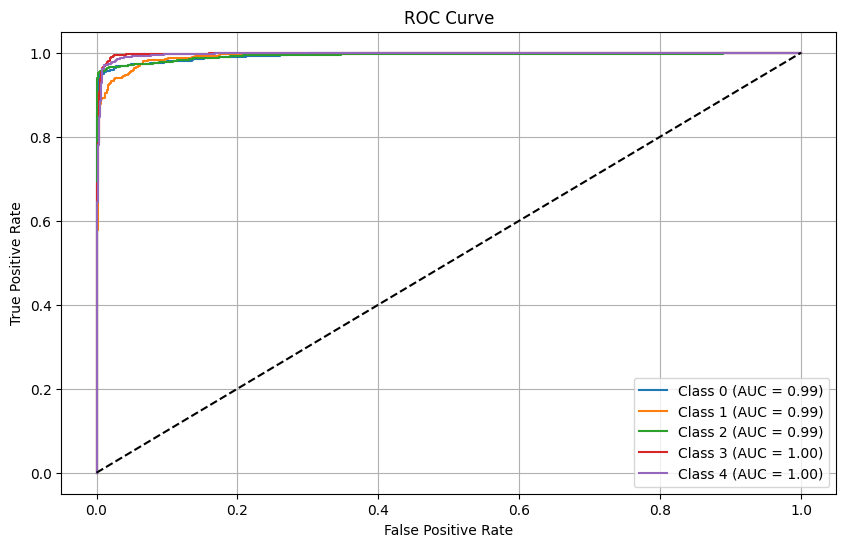

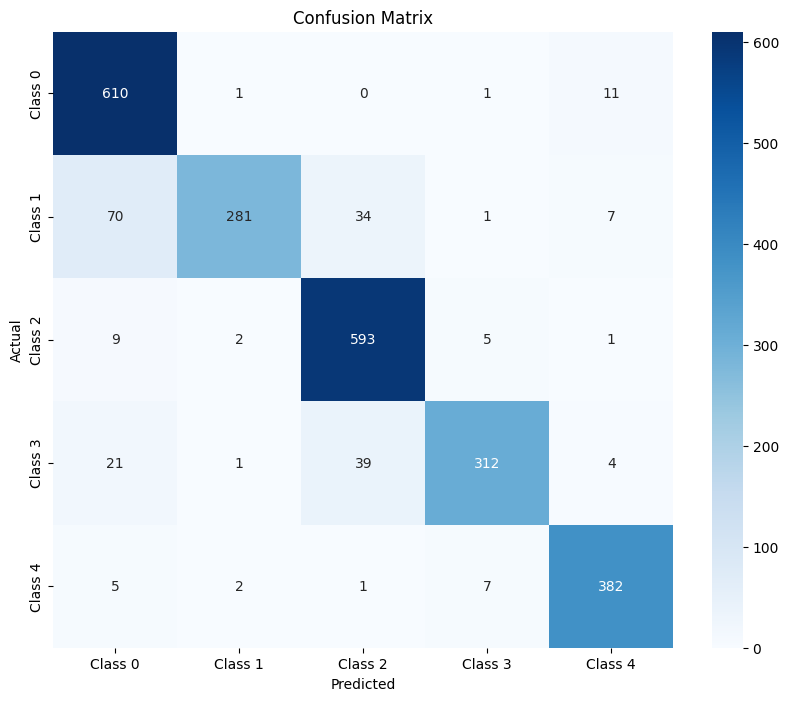

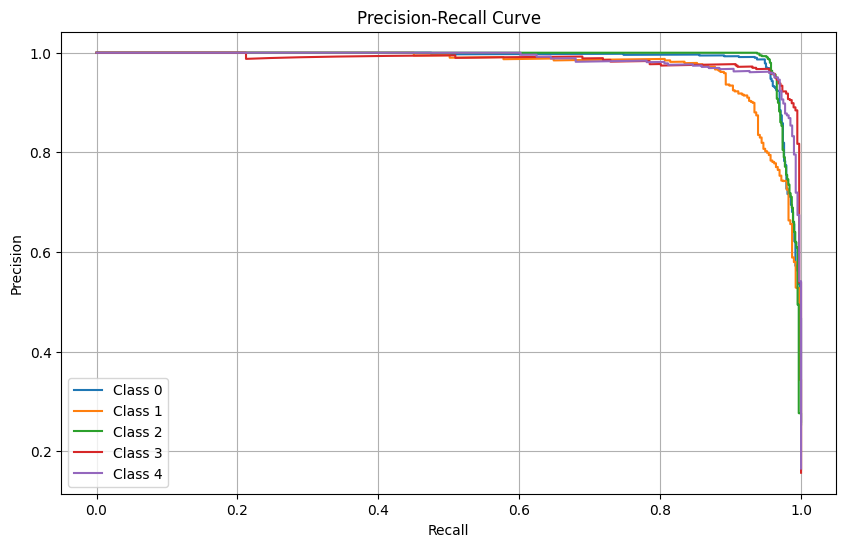

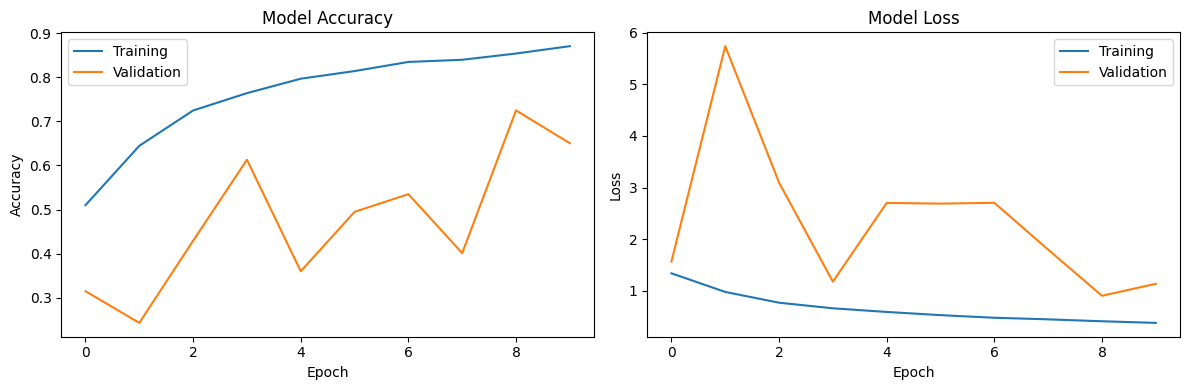


Final Model Performance:
Test Accuracy: 0.9075
F1 Score: 0.9051
Final predictions evaluated.


In [13]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.applications import ResNet50, InceptionV3, EfficientNetB0
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Conv2D, MaxPooling2D, Dropout, BatchNormalization
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from sklearn.metrics import accuracy_score, roc_curve, auc, precision_recall_curve, confusion_matrix, f1_score

# Define class labels
class_labels = ['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4']

# Define callbacks
checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss', mode='min')
earlystop = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=7, min_lr=1e-6)
callbacks = [checkpoint, earlystop, reduce_lr]

# Function to create a model with optimizations
def create_model(base_model_class, input_shape=(224, 224, 3), num_classes=5):
    base_model = base_model_class(weights='imagenet', include_top=False, input_shape=input_shape)

    # Unfreeze last 10 layers for fine-tuning
    for layer in base_model.layers[:-10]:
        layer.trainable = False
    for layer in base_model.layers[-10:]:
        layer.trainable = True

    x = base_model.output
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2))(x)

    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2))(x)

    x = GlobalAveragePooling2D()(x)
    x = Dense(256)(x)
    x = BatchNormalization()(x)
    x = tf.keras.layers.LeakyReLU()(x)
    x = Dropout(0.5)(x)
    output = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs=base_model.input, outputs=output)

    model.compile(optimizer=RMSprop(learning_rate=1e-4),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Train the models
resnet_model = create_model(ResNet50)
history_resnet = resnet_model.fit(X_train_scaled, Y_train, epochs=10, batch_size=32, verbose=1, validation_split=0.2, callbacks=callbacks)

inception_model = create_model(InceptionV3)
history_inception = inception_model.fit(X_train_scaled, Y_train, epochs=10, batch_size=32, verbose=1, validation_split=0.2, callbacks=callbacks)

efficientnet_model = create_model(EfficientNetB0)
history_efficientnet = efficientnet_model.fit(X_train_scaled, Y_train, epochs=10, batch_size=32, verbose=1, validation_split=0.2, callbacks=callbacks)

# Get predictions from all models (probabilities from softmax)
resnet_preds_prob = resnet_model.predict(X_test_scaled)
inception_preds_prob = inception_model.predict(X_test_scaled)
efficientnet_preds_prob = efficientnet_model.predict(X_test_scaled)

# Ensure that all predictions have the same shape
assert resnet_preds_prob.shape == inception_preds_prob.shape == efficientnet_preds_prob.shape, "Prediction shapes do not match!"

# Average the predictions from all models
averaged_preds_prob = (resnet_preds_prob + inception_preds_prob + efficientnet_preds_prob) / 3

# Get final predicted classes (argmax of averaged probabilities)
final_preds = np.argmax(averaged_preds_prob, axis=1)

# Ensure final_preds and Y_test have the same number of samples
if final_preds.shape[0] != Y_test.shape[0]:
    raise ValueError("Number of samples in final_preds and Y_test do not match!")

# Visualizations and Metrics
def plot_all_visualizations(Y_test, Y_test_pred, Y_test_pred_prob, history):
    # ROC Curve
    plt.figure(figsize=(10, 6))
    for i in range(5):
        y_true_binary = (Y_test == i).astype(int)
        y_score = Y_test_pred_prob[:, i]
        fpr, tpr, _ = roc_curve(y_true_binary, y_score)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], 'k--')
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()

    # Confusion Matrix
    conf_matrix = confusion_matrix(Y_test, Y_test_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Precision-Recall Curve
    plt.figure(figsize=(10, 6))
    for i in range(5):
        precision, recall, _ = precision_recall_curve((Y_test == i).astype(int), Y_test_pred_prob[:, i])
        plt.plot(recall, precision, label=f'Class {i}')
    plt.title('Precision-Recall Curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend()
    plt.grid()
    plt.show()

    # Training Curves
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training')
    plt.plot(history.history['val_accuracy'], label='Validation')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training')
    plt.plot(history.history['val_loss'], label='Validation')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.tight_layout()
    plt.show()

# Generate all visualizations
plot_all_visualizations(Y_test, final_preds, averaged_preds_prob, history_resnet)

# Print final metrics
print("\nFinal Model Performance:")
print(f"Test Accuracy: {accuracy_score(Y_test, final_preds):.4f}")
print(f"F1 Score: {f1_score(Y_test, final_preds, average='weighted'):.4f}")

print("Final predictions evaluated.")


2.[Vgg16+Inception+EfficientNet]

Epoch 1/10
239/240 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.4410 - loss: 1.5182

240/240 ━━━━━━━━━━━━━━━━━━━━ 32s 78ms/step - accuracy: 0.4417 - loss: 1.5165 - val_accuracy: 0.2906 - val_loss: 1.6579 - learning_rate: 1.0000e-04
Epoch 2/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 13s 55ms/step - accuracy: 0.6434 - loss: 0.9911 - val_accuracy: 0.3828 - val_loss: 1.8650 - learning_rate: 1.0000e-04
Epoch 3/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 13s 55ms/step - accuracy: 0.7245 - loss: 0.7707 - val_accuracy: 0.5651 - val_loss: 2.4800 - learning_rate: 1.0000e-04
Epoch 4/10
239/240 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.7627 - loss: 0.6434

240/240 ━━━━━━━━━━━━━━━━━━━━ 14s 58ms/step - accuracy: 0.7627 - loss: 0.6436 - val_accuracy: 0.6562 - val_loss: 0.9581 - learning_rate: 1.0000e-04
Epoch 5/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 13s 54ms/step - accuracy: 0.7803 - loss: 0.5910 - val_accuracy: 0.5063 - val_loss: 2.1676 - learning_rate: 1.0000e-04
Epoch 6/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 13s 54ms/step - accuracy: 0.8156 - loss: 0.5090 - val_accuracy: 0.4396 - val_loss: 2.2549 - learning_rate: 1.0000e-04
Epoch 7/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 13s 54ms/step - accuracy: 0.8372 - loss: 0.4583 - val_accuracy: 0.5734 - val_loss: 2.1187 - learning_rate: 1.0000e-04
Epoch 8/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 13s 54ms/step - accuracy: 0.8522 - loss: 0.4244 - val_accuracy: 0.3573 - val_loss: 3.8851 - learning_rate: 1.0000e-04
Epoch 9/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 13s 54ms/step - accuracy: 0.8615 - loss: 0.3985 - val_accuracy: 0.4135 - val_loss: 3.4307 - learning_rate: 1.0000e-04
Epoch 10/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 13s 54ms/step - accura

240/240 ━━━━━━━━━━━━━━━━━━━━ 29s 65ms/step - accuracy: 0.5545 - loss: 1.2119 - val_accuracy: 0.8719 - val_loss: 0.3733 - learning_rate: 1.0000e-04
Epoch 2/3
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.8829 - loss: 0.3345

240/240 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.8830 - loss: 0.3344 - val_accuracy: 0.8859 - val_loss: 0.3235 - learning_rate: 1.0000e-04
Epoch 3/3
239/240 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9402 - loss: 0.1751

240/240 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.9402 - loss: 0.1751 - val_accuracy: 0.9094 - val_loss: 0.2821 - learning_rate: 1.0000e-04
Epoch 1/3
240/240 ━━━━━━━━━━━━━━━━━━━━ 36s 61ms/step - accuracy: 0.2095 - loss: 2.0830 - val_accuracy: 0.1651 - val_loss: 1.6687 - learning_rate: 1.0000e-04
Epoch 2/3
240/240 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - accuracy: 0.2018 - loss: 1.9719 - val_accuracy: 0.2776 - val_loss: 1.6098 - learning_rate: 1.0000e-04
Epoch 3/3
240/240 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step - accuracy: 0.2130 - loss: 1.8704 - val_accuracy: 0.3182 - val_loss: 1.5907 - learning_rate: 1.0000e-04
75/75 ━━━━━━━━━━━━━━━━━━━━ 7s 40ms/step
75/75 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step
75/75 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step


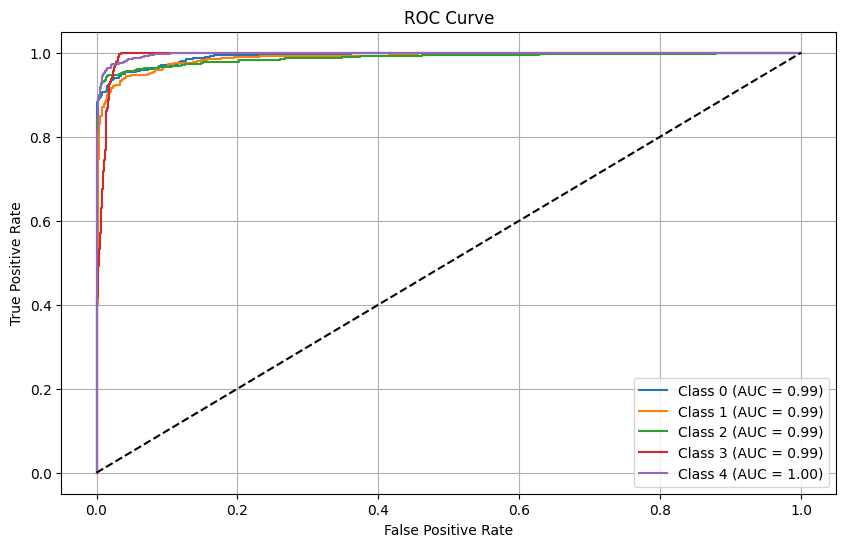

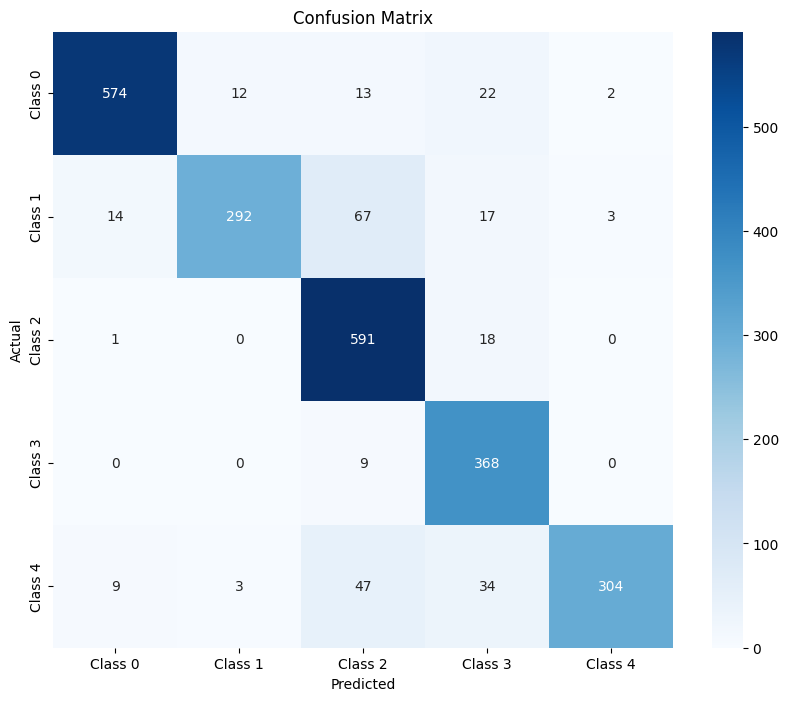

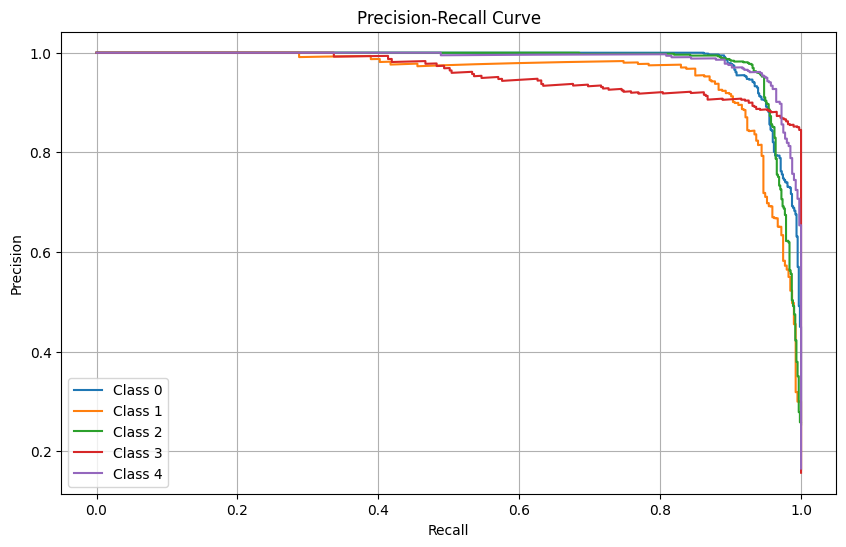

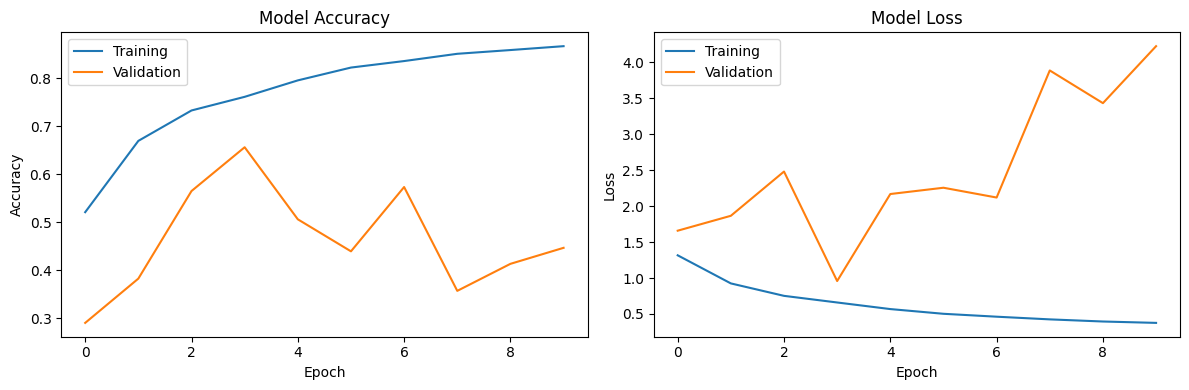


Final Model Performance:
Test Accuracy: 0.8871
F1 Score: 0.8861
Final predictions evaluated.


In [14]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.applications import ResNet50, InceptionV3, EfficientNetB0
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Conv2D, MaxPooling2D, Dropout, BatchNormalization
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from sklearn.metrics import accuracy_score, roc_curve, auc, precision_recall_curve, confusion_matrix, f1_score

# Define class labels
class_labels = ['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4']

# Define callbacks
checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss', mode='min')
earlystop = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=7, min_lr=1e-6)
callbacks = [checkpoint, earlystop, reduce_lr]

# Function to create a model with optimizations
def create_model(base_model_class, input_shape=(224, 224, 3), num_classes=5):
    base_model = base_model_class(weights='imagenet', include_top=False, input_shape=input_shape)

    # Unfreeze last 10 layers for fine-tuning
    for layer in base_model.layers[:-10]:
        layer.trainable = False
    for layer in base_model.layers[-10:]:
        layer.trainable = True

    x = base_model.output
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2))(x)

    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2))(x)

    x = GlobalAveragePooling2D()(x)
    x = Dense(256)(x)
    x = BatchNormalization()(x)
    x = tf.keras.layers.LeakyReLU()(x)
    x = Dropout(0.5)(x)
    output = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs=base_model.input, outputs=output)

    model.compile(optimizer=RMSprop(learning_rate=1e-4),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Train the models
resnet_model = create_model(ResNet50)
history_resnet = resnet_model.fit(X_train_scaled, Y_train, epochs=10, batch_size=32, verbose=1, validation_split=0.2, callbacks=callbacks)

inception_model = create_model(InceptionV3)
history_inception = inception_model.fit(X_train_scaled, Y_train, epochs=10, batch_size=32, verbose=1, validation_split=0.2, callbacks=callbacks)

efficientnet_model = create_model(EfficientNetB0)
history_efficientnet = efficientnet_model.fit(X_train_scaled, Y_train, epochs=10, batch_size=32, verbose=1, validation_split=0.2, callbacks=callbacks)

# Get predictions from all models (probabilities from softmax)
resnet_preds_prob = resnet_model.predict(X_test_scaled)
inception_preds_prob = inception_model.predict(X_test_scaled)
efficientnet_preds_prob = efficientnet_model.predict(X_test_scaled)

# Ensure that all predictions have the same shape
assert resnet_preds_prob.shape == inception_preds_prob.shape == efficientnet_preds_prob.shape, "Prediction shapes do not match!"

# Average the predictions from all models
averaged_preds_prob = (resnet_preds_prob + inception_preds_prob + efficientnet_preds_prob) / 3

# Get final predicted classes (argmax of averaged probabilities)
final_preds = np.argmax(averaged_preds_prob, axis=1)

# Ensure final_preds and Y_test have the same number of samples
if final_preds.shape[0] != Y_test.shape[0]:
    raise ValueError("Number of samples in final_preds and Y_test do not match!")

# Visualizations and Metrics
def plot_all_visualizations(Y_test, Y_test_pred, Y_test_pred_prob, history):
    # ROC Curve
    plt.figure(figsize=(10, 6))
    for i in range(5):
        y_true_binary = (Y_test == i).astype(int)
        y_score = Y_test_pred_prob[:, i]
        fpr, tpr, _ = roc_curve(y_true_binary, y_score)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], 'k--')
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()

    # Confusion Matrix
    conf_matrix = confusion_matrix(Y_test, Y_test_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Precision-Recall Curve
    plt.figure(figsize=(10, 6))
    for i in range(5):
        precision, recall, _ = precision_recall_curve((Y_test == i).astype(int), Y_test_pred_prob[:, i])
        plt.plot(recall, precision, label=f'Class {i}')
    plt.title('Precision-Recall Curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend()
    plt.grid()
    plt.show()

    # Training Curves
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training')
    plt.plot(history.history['val_accuracy'], label='Validation')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training')
    plt.plot(history.history['val_loss'], label='Validation')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.tight_layout()
    plt.show()

# Generate all visualizations
plot_all_visualizations(Y_test, final_preds, averaged_preds_prob, history_resnet)

# Print final metrics
print("\nFinal Model Performance:")
print(f"Test Accuracy: {accuracy_score(Y_test, final_preds):.4f}")
print(f"F1 Score: {f1_score(Y_test, final_preds, average='weighted'):.4f}")

print("Final predictions evaluated.")


##3.[Resnet+DenseNet+MobileNet-->Resnet]

Epoch 1/2
239/240 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.4465 - loss: 1.5326

240/240 ━━━━━━━━━━━━━━━━━━━━ 32s 79ms/step - accuracy: 0.4471 - loss: 1.5309 - val_accuracy: 0.2391 - val_loss: 3.4758 - learning_rate: 1.0000e-04
Epoch 2/2
240/240 ━━━━━━━━━━━━━━━━━━━━ 13s 55ms/step - accuracy: 0.6451 - loss: 0.9902 - val_accuracy: 0.2427 - val_loss: 3.9653 - learning_rate: 1.0000e-04
Epoch 1/2
239/240 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.5821 - loss: 1.1200

240/240 ━━━━━━━━━━━━━━━━━━━━ 52s 102ms/step - accuracy: 0.5834 - loss: 1.1167 - val_accuracy: 0.9135 - val_loss: 0.2711 - learning_rate: 1.0000e-04
Epoch 2/2
239/240 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.9177 - loss: 0.2541

240/240 ━━━━━━━━━━━━━━━━━━━━ 13s 55ms/step - accuracy: 0.9178 - loss: 0.2538 - val_accuracy: 0.9500 - val_loss: 0.1634 - learning_rate: 1.0000e-04
Epoch 1/2
240/240 ━━━━━━━━━━━━━━━━━━━━ 47s 171ms/step - accuracy: 0.3380 - loss: 1.8266 - val_accuracy: 0.5729 - val_loss: 1.4362 - learning_rate: 1.0000e-04
Epoch 2/2
240/240 ━━━━━━━━━━━━━━━━━━━━ 39s 163ms/step - accuracy: 0.7330 - loss: 0.7173 - val_accuracy: 0.5870 - val_loss: 1.4759 - learning_rate: 1.0000e-04
75/75 ━━━━━━━━━━━━━━━━━━━━ 7s 40ms/step
75/75 ━━━━━━━━━━━━━━━━━━━━ 12s 38ms/step
75/75 ━━━━━━━━━━━━━━━━━━━━ 7s 89ms/step


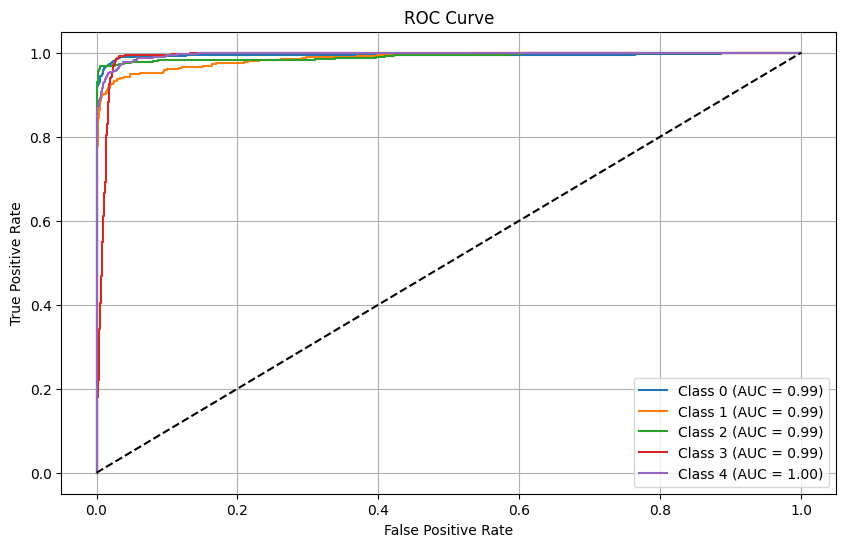

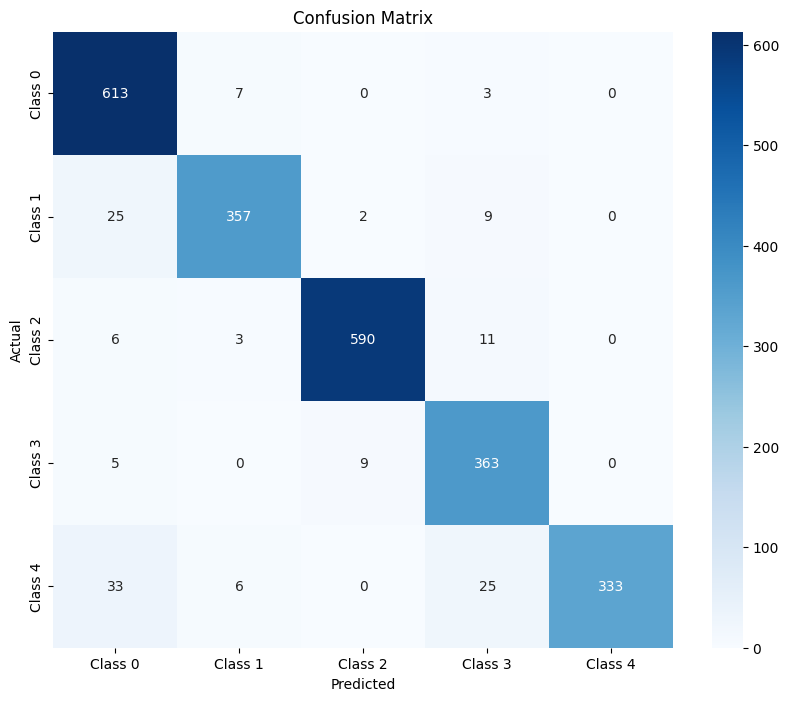

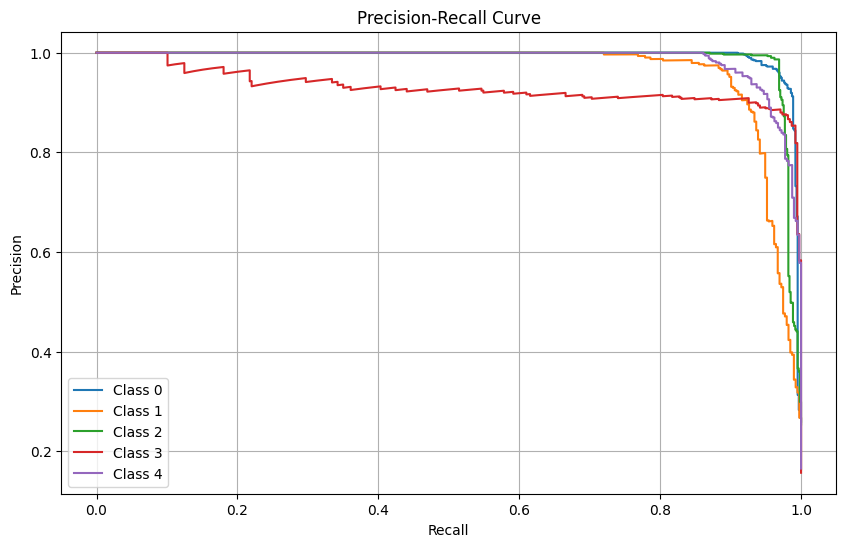

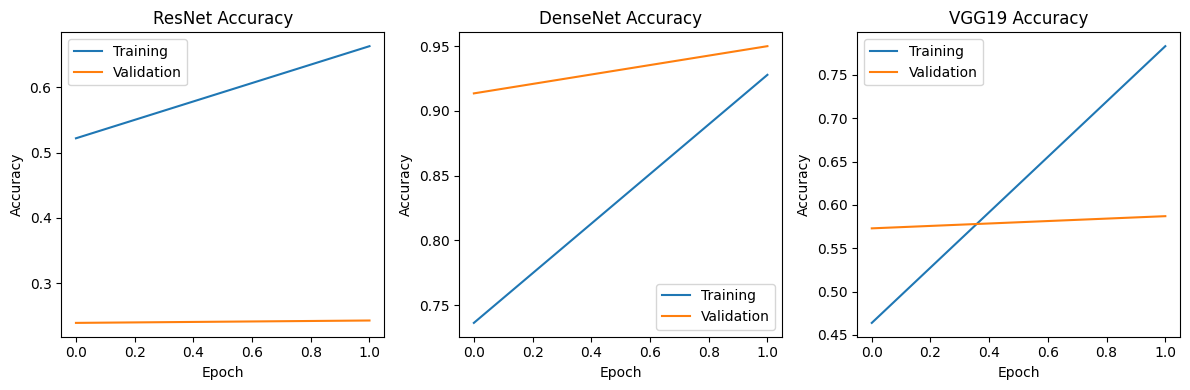


Final Model Performance:
Test Accuracy: 0.9400
F1 Score: 0.9398
Final predictions evaluated.


In [17]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.applications import ResNet50, DenseNet121, VGG19
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Conv2D, MaxPooling2D, Dropout, BatchNormalization
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from sklearn.metrics import accuracy_score, roc_curve, auc, precision_recall_curve, confusion_matrix, f1_score

# Define class labels
class_labels = ['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4']

# Define callbacks
checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss', mode='min')
earlystop = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=7, min_lr=1e-6)
callbacks = [checkpoint, earlystop, reduce_lr]

# Function to create a model with optimizations
def create_model(base_model_class, input_shape=(224, 224, 3), num_classes=5):
    base_model = base_model_class(weights='imagenet', include_top=False, input_shape=input_shape)

    # Unfreeze last 10 layers for fine-tuning
    for layer in base_model.layers[:-10]:
        layer.trainable = False
    for layer in base_model.layers[-10:]:
        layer.trainable = True

    x = base_model.output
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2))(x)

    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2))(x)

    x = GlobalAveragePooling2D()(x)
    x = Dense(256)(x)
    x = BatchNormalization()(x)
    x = tf.keras.layers.LeakyReLU()(x)
    x = Dropout(0.5)(x)
    output = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs=base_model.input, outputs=output)

    model.compile(optimizer=RMSprop(learning_rate=1e-4),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Train the models
resnet_model = create_model(ResNet50)
history_resnet = resnet_model.fit(X_train_scaled, Y_train, epochs=10, batch_size=32, verbose=1, validation_split=0.2, callbacks=callbacks)

densenet_model = create_model(DenseNet121)
history_densenet = densenet_model.fit(X_train_scaled, Y_train, epochs=10, batch_size=32, verbose=1, validation_split=0.2, callbacks=callbacks)

vgg19_model = create_model(VGG19)
history_vgg19 = vgg19_model.fit(X_train_scaled, Y_train, epochs=10, batch_size=32, verbose=1, validation_split=0.2, callbacks=callbacks)

# Get predictions from all models (probabilities from softmax)
resnet_preds_prob = resnet_model.predict(X_test_scaled)
densenet_preds_prob = densenet_model.predict(X_test_scaled)
vgg19_preds_prob = vgg19_model.predict(X_test_scaled)

# Ensure that all predictions have the same shape
assert resnet_preds_prob.shape == densenet_preds_prob.shape == vgg19_preds_prob.shape, "Prediction shapes do not match!"

# Average the predictions from all models
averaged_preds_prob = (resnet_preds_prob + densenet_preds_prob + vgg19_preds_prob) / 3

# Get final predicted classes (argmax of averaged probabilities)
final_preds = np.argmax(averaged_preds_prob, axis=1)

# Ensure final_preds and Y_test have the same number of samples
if final_preds.shape[0] != Y_test.shape[0]:
    raise ValueError("Number of samples in final_preds and Y_test do not match!")

# Visualizations and Metrics
def plot_all_visualizations(Y_test, Y_test_pred, Y_test_pred_prob, history_resnet, history_densenet, history_vgg19):
    # ROC Curve
    plt.figure(figsize=(10, 6))
    for i in range(5):
        y_true_binary = (Y_test == i).astype(int)
        y_score = Y_test_pred_prob[:, i]
        fpr, tpr, _ = roc_curve(y_true_binary, y_score)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], 'k--')
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()

    # Confusion Matrix
    conf_matrix = confusion_matrix(Y_test, Y_test_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Precision-Recall Curve
    plt.figure(figsize=(10, 6))
    for i in range(5):
        precision, recall, _ = precision_recall_curve((Y_test == i).astype(int), Y_test_pred_prob[:, i])
        plt.plot(recall, precision, label=f'Class {i}')
    plt.title('Precision-Recall Curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend()
    plt.grid()
    plt.show()

    # Training Curves for all models
    plt.figure(figsize=(12, 4))

    # ResNet
    plt.subplot(1, 3, 1)
    plt.plot(history_resnet.history['accuracy'], label='Training')
    plt.plot(history_resnet.history['val_accuracy'], label='Validation')
    plt.title('ResNet Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # DenseNet
    plt.subplot(1, 3, 2)
    plt.plot(history_densenet.history['accuracy'], label='Training')
    plt.plot(history_densenet.history['val_accuracy'], label='Validation')
    plt.title('DenseNet Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # VGG19
    plt.subplot(1, 3, 3)
    plt.plot(history_vgg19.history['accuracy'], label='Training')
    plt.plot(history_vgg19.history['val_accuracy'], label='Validation')
    plt.title('VGG19 Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Generate all visualizations
plot_all_visualizations(Y_test, final_preds, averaged_preds_prob, history_resnet, history_densenet, history_vgg19)

# Print final metrics
print("\nFinal Model Performance:")
print(f"Test Accuracy: {accuracy_score(Y_test, final_preds):.4f}")
print(f"F1 Score: {f1_score(Y_test, final_preds, average='weighted'):.4f}")

print("Final predictions evaluated.")

4. Pretrained Models = ['ResNet50', 'InceptionV3','EfficientNetB0', 'VGG16', 'MobileNetV2', 'DenseNet121', 'Xception']


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training ResNet50...
Epoch 1/5
239/240 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.4620 - loss: 1.5160

240/240 ━━━━━━━━━━━━━━━━━━━━ 32s 78ms/step - accuracy: 0.4625 - loss: 1.5143 - val_accuracy: 0.2599 - val_loss: 2.3846 - learning_rate: 1.0000e-04
Epoch 2/5
239/240 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.6414 - loss: 0.9964

240/240 ━━━━━━━━━━━━━━━━━━━━ 14s 58ms/step - accuracy: 0.6417 - loss: 0.9957 - val_accuracy: 0.3396 - val_loss: 2.3206 - learning_rate: 1.0000e-04
Epoch 3/5
240/240 ━━━━━━━━━━━━━━━━━━━━ 13s 55ms/step - accuracy: 0.7293 - loss: 0.7731 - val_accuracy: 0.2328 - val_loss: 3.9793 - learning_rate: 1.0000e-04
Epoch 4/5
240/240 ━━━━━━━━━━━━━━━━━━━━ 13s 54ms/step - accuracy: 0.7642 - loss: 0.6667 - val_accuracy: 0.2896 - val_loss: 5.0738 - learning_rate: 1.0000e-04
Epoch 5/5
240/240 ━━━━━━━━━━━━━━━━━━━━ 13s 54ms/step - accuracy: 0.8051 - loss: 0.5344 - val_accuracy: 0.3443 - val_loss: 5.4616 - learning_rate: 1.0000e-04
ResNet50 validation accuracy: 0.3443
Training InceptionV3...
Epoch 1/5
239/240 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.5206 - loss: 1.2699

240/240 ━━━━━━━━━━━━━━━━━━━━ 29s 63ms/step - accuracy: 0.5218 - loss: 1.2668 - val_accuracy: 0.8583 - val_loss: 0.4254 - learning_rate: 1.0000e-04
Epoch 2/5
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.8719 - loss: 0.3636

240/240 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.8720 - loss: 0.3635 - val_accuracy: 0.9161 - val_loss: 0.2645 - learning_rate: 1.0000e-04
Epoch 3/5
240/240 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step - accuracy: 0.9419 - loss: 0.1844 - val_accuracy: 0.8807 - val_loss: 0.3678 - learning_rate: 1.0000e-04
Epoch 4/5
240/240 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - accuracy: 0.9628 - loss: 0.1146 - val_accuracy: 0.8880 - val_loss: 0.3300 - learning_rate: 1.0000e-04
Epoch 5/5
240/240 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - accuracy: 0.9716 - loss: 0.0795 - val_accuracy: 0.9198 - val_loss: 0.2677 - learning_rate: 1.0000e-04
InceptionV3 validation accuracy: 0.9198
Training EfficientNetB0...
Epoch 1/5
240/240 ━━━━━━━━━━━━━━━━━━━━ 36s 61ms/step - accuracy: 0.2078 - loss: 2.0854 - val_accuracy: 0.3016 - val_loss: 1.9625 - learning_rate: 1.0000e-04
Epoch 2/5
240/240 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - accuracy: 0.2198 - loss: 1.8999 - val_accuracy: 0.1651 - val_loss: 1.6336 - learning_rate: 1.0000e-04
Epoch 

240/240 ━━━━━━━━━━━━━━━━━━━━ 34s 144ms/step - accuracy: 0.9363 - loss: 0.1979 - val_accuracy: 0.9411 - val_loss: 0.1851 - learning_rate: 1.0000e-04
Epoch 5/5
240/240 ━━━━━━━━━━━━━━━━━━━━ 34s 142ms/step - accuracy: 0.9568 - loss: 0.1294 - val_accuracy: 0.8828 - val_loss: 0.4386 - learning_rate: 1.0000e-04
VGG16 validation accuracy: 0.8828
Training MobileNetV2...
Epoch 1/5
240/240 ━━━━━━━━━━━━━━━━━━━━ 23s 46ms/step - accuracy: 0.6408 - loss: 0.9754 - val_accuracy: 0.6922 - val_loss: 0.8330 - learning_rate: 1.0000e-04
Epoch 2/5
240/240 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - accuracy: 0.9060 - loss: 0.2627 - val_accuracy: 0.7609 - val_loss: 0.6933 - learning_rate: 1.0000e-04
Epoch 3/5
240/240 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - accuracy: 0.9380 - loss: 0.1773 - val_accuracy: 0.8526 - val_loss: 0.3789 - learning_rate: 1.0000e-04
Epoch 4/5
240/240 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - accuracy: 0.9554 - loss: 0.1349 - val_accuracy: 0.8490 - val_loss: 0.4335 - learning_rate: 1.0000e-04
Epoch 5/5
2

240/240 ━━━━━━━━━━━━━━━━━━━━ 13s 54ms/step - accuracy: 0.9142 - loss: 0.2592 - val_accuracy: 0.9516 - val_loss: 0.1468 - learning_rate: 1.0000e-04
Epoch 3/5
239/240 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.9594 - loss: 0.1292

240/240 ━━━━━━━━━━━━━━━━━━━━ 13s 54ms/step - accuracy: 0.9594 - loss: 0.1291 - val_accuracy: 0.9563 - val_loss: 0.1330 - learning_rate: 1.0000e-04
Epoch 4/5
239/240 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.9747 - loss: 0.0791

240/240 ━━━━━━━━━━━━━━━━━━━━ 13s 53ms/step - accuracy: 0.9748 - loss: 0.0791 - val_accuracy: 0.9594 - val_loss: 0.1285 - learning_rate: 1.0000e-04
Epoch 5/5
239/240 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.9813 - loss: 0.0519

240/240 ━━━━━━━━━━━━━━━━━━━━ 13s 54ms/step - accuracy: 0.9813 - loss: 0.0519 - val_accuracy: 0.9661 - val_loss: 0.1082 - learning_rate: 1.0000e-04
DenseNet121 validation accuracy: 0.9661
Training Xception...
Epoch 1/5
240/240 ━━━━━━━━━━━━━━━━━━━━ 35s 81ms/step - accuracy: 0.6839 - loss: 0.8657 - val_accuracy: 0.9089 - val_loss: 0.2329 - learning_rate: 1.0000e-04
Epoch 2/5
240/240 ━━━━━━━━━━━━━━━━━━━━ 16s 65ms/step - accuracy: 0.9541 - loss: 0.1559 - val_accuracy: 0.9557 - val_loss: 0.1410 - learning_rate: 1.0000e-04
Epoch 3/5
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.9760 - loss: 0.0814

240/240 ━━━━━━━━━━━━━━━━━━━━ 16s 66ms/step - accuracy: 0.9760 - loss: 0.0814 - val_accuracy: 0.9688 - val_loss: 0.1068 - learning_rate: 1.0000e-04
Epoch 4/5
240/240 ━━━━━━━━━━━━━━━━━━━━ 15s 63ms/step - accuracy: 0.9884 - loss: 0.0403 - val_accuracy: 0.9396 - val_loss: 0.2098 - learning_rate: 1.0000e-04
Epoch 5/5
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.9897 - loss: 0.0338

240/240 ━━━━━━━━━━━━━━━━━━━━ 16s 66ms/step - accuracy: 0.9897 - loss: 0.0338 - val_accuracy: 0.9771 - val_loss: 0.0923 - learning_rate: 1.0000e-04
Xception validation accuracy: 0.9771
75/75 ━━━━━━━━━━━━━━━━━━━━ 6s 40ms/step
75/75 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step
75/75 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step
75/75 ━━━━━━━━━━━━━━━━━━━━ 6s 77ms/step
75/75 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step
75/75 ━━━━━━━━━━━━━━━━━━━━ 13s 38ms/step
75/75 ━━━━━━━━━━━━━━━━━━━━ 6s 46ms/step
Final predictions shape: (2400,)


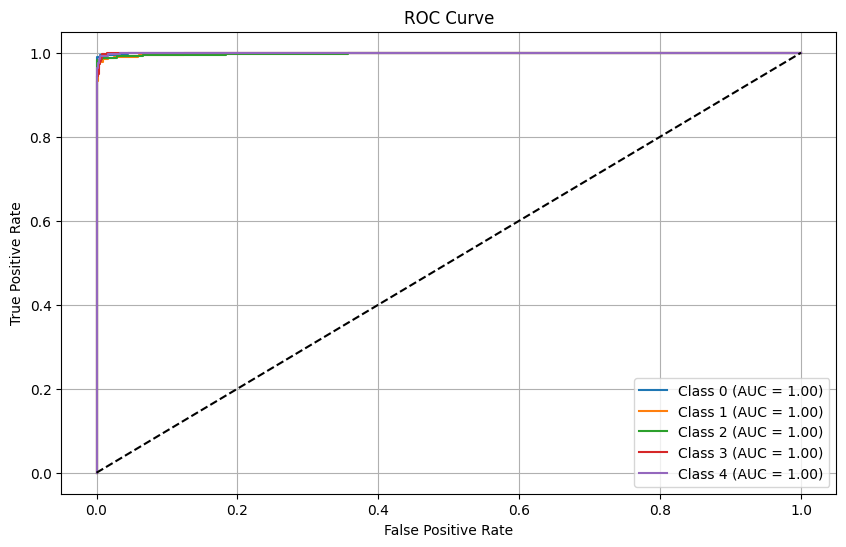

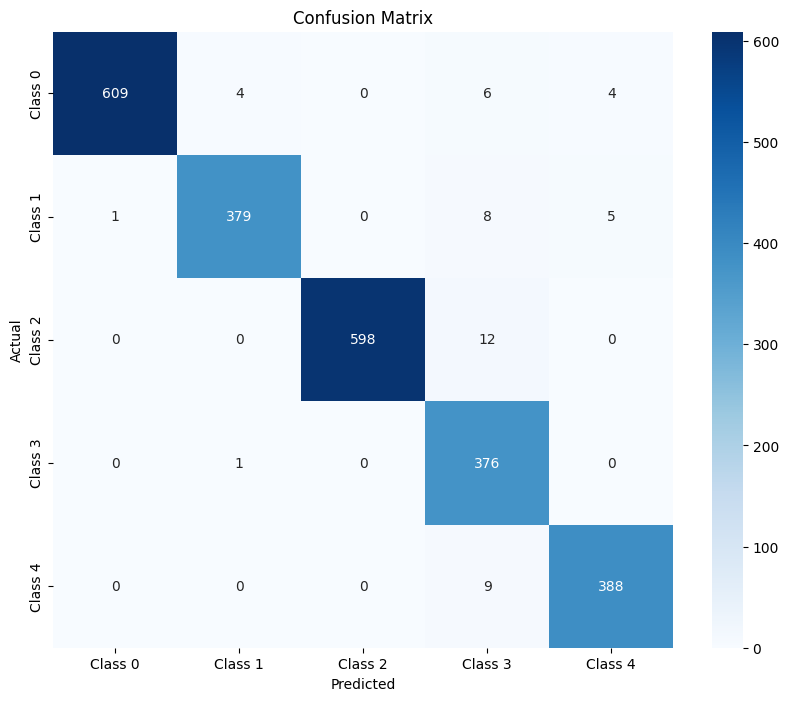

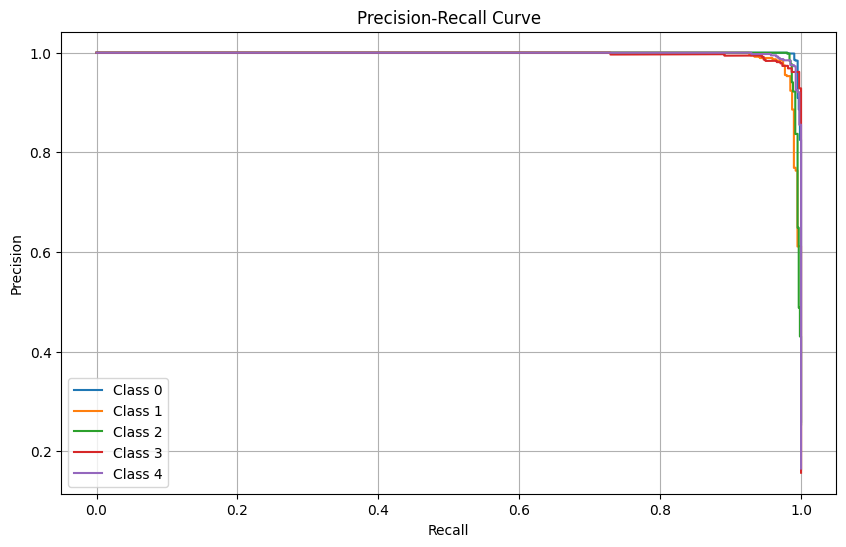

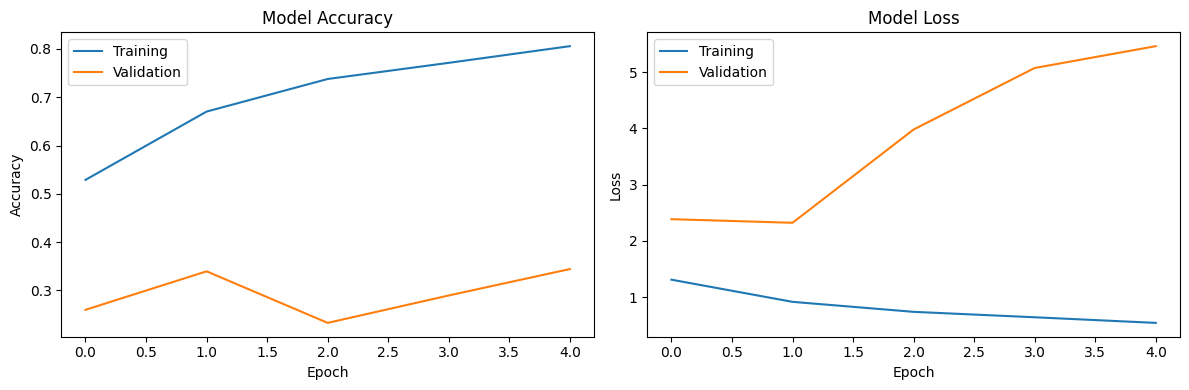


Final Model Performance:
Test Accuracy: 0.9792
F1 Score: 0.9794
Final predictions evaluated.


In [15]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.applications import ResNet50, InceptionV3, EfficientNetB0, VGG16, MobileNetV2, DenseNet121, Xception
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Conv2D, MaxPooling2D, Dropout, BatchNormalization
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from sklearn.metrics import accuracy_score, roc_curve, auc, precision_recall_curve, confusion_matrix, f1_score

# Define class labels
class_labels = ['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4']

# Define callbacks
checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss', mode='min')
earlystop = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=7, min_lr=1e-6)
callbacks = [checkpoint, earlystop, reduce_lr]

# Function to create a model with optimizations
def create_model(base_model_class, input_shape=(224, 224, 3), num_classes=5):
    base_model = base_model_class(weights='imagenet', include_top=False, input_shape=input_shape)

    # Unfreeze last 10 layers for fine-tuning
    for layer in base_model.layers[:-10]:
        layer.trainable = False
    for layer in base_model.layers[-10:]:
        layer.trainable = True

    x = base_model.output
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2))(x)

    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2))(x)

    x = GlobalAveragePooling2D()(x)
    x = Dense(256)(x)
    x = BatchNormalization()(x)
    x = tf.keras.layers.LeakyReLU()(x)
    x = Dropout(0.5)(x)
    output = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs=base_model.input, outputs=output)

    model.compile(optimizer=RMSprop(learning_rate=1e-4),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Create models for each architecture
models = {
    'ResNet50': create_model(ResNet50),
    'InceptionV3': create_model(InceptionV3),
    'EfficientNetB0': create_model(EfficientNetB0),
    'VGG16': create_model(VGG16),
    'MobileNetV2': create_model(MobileNetV2),
    'DenseNet121': create_model(DenseNet121),
    'Xception': create_model(Xception)
}

# Train all models and evaluate on validation set
history_dict = {}
model_accuracies = {}

for model_name, model in models.items():
    print(f"Training {model_name}...")
    history_dict[model_name] = model.fit(X_train_scaled, Y_train, epochs=10, batch_size=32, verbose=1, validation_split=0.2, callbacks=callbacks)
    val_accuracy = history_dict[model_name].history['val_accuracy'][-1]
    model_accuracies[model_name] = val_accuracy
    print(f"{model_name} validation accuracy: {val_accuracy:.4f}")

# Calculate weights based on model accuracies
total_accuracy = sum(model_accuracies.values())
model_weights = {model_name: accuracy / total_accuracy for model_name, accuracy in model_accuracies.items()}

# Get predictions from all models (probabilities from softmax)
predictions_prob = {model_name: model.predict(X_test_scaled) for model_name, model in models.items()}

# Weighted average of predictions
weighted_preds_prob = np.zeros_like(predictions_prob['ResNet50'])  # Initialize with the shape of one model's predictions

for model_name, pred_prob in predictions_prob.items():
    weighted_preds_prob += model_weights[model_name] * pred_prob

# Get final predicted classes (argmax of weighted probabilities)
final_preds = np.argmax(weighted_preds_prob, axis=1)

# Ensure final_preds and Y_test have the same number of samples
print(f"Final predictions shape: {final_preds.shape}")
if final_preds.shape[0] != Y_test.shape[0]:
    raise ValueError("Number of samples in final_preds and Y_test do not match!")

# Visualizations
def plot_all_visualizations(Y_test, Y_test_pred, Y_test_pred_prob, history):
    # ROC Curve
    plt.figure(figsize=(10, 6))
    for i in range(5):
        y_true_binary = (Y_test == i).astype(int)
        y_score = Y_test_pred_prob[:, i]
        fpr, tpr, _ = roc_curve(y_true_binary, y_score)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], 'k--')
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()

    # Confusion Matrix
    conf_matrix = confusion_matrix(Y_test, Y_test_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Precision-Recall Curve
    plt.figure(figsize=(10, 6))
    for i in range(5):
        precision, recall, _ = precision_recall_curve((Y_test == i).astype(int), Y_test_pred_prob[:, i])
        plt.plot(recall, precision, label=f'Class {i}')
    plt.title('Precision-Recall Curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend()
    plt.grid()
    plt.show()

    # Training Curves
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training')
    plt.plot(history.history['val_accuracy'], label='Validation')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training')
    plt.plot(history.history['val_loss'], label='Validation')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.tight_layout()
    plt.show()

# Generate all visualizations
plot_all_visualizations(Y_test, final_preds, weighted_preds_prob, history_dict['ResNet50'])

# Print final metrics
print("\nFinal Model Performance:")
print(f"Test Accuracy: {accuracy_score(Y_test, final_preds):.4f}")
print(f"F1 Score: {f1_score(Y_test, final_preds, average='weighted'):.4f}")

print("Final predictions evaluated.")

#Single Transfer Model Trianing

#CNN

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from sklearn.metrics import accuracy_score, roc_curve, auc, precision_recall_curve, confusion_matrix, f1_score

# Define class labels
class_labels = ['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4']

# Define callbacks
checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss', mode='min')
earlystop = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=7, min_lr=1e-6)
callbacks = [checkpoint, earlystop, reduce_lr]

# Function to create a base CNN model
def create_base_cnn_model(input_shape=(224, 224, 3), num_classes=5):
    model = Sequential()

    # First convolutional block
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))

    # Second convolutional block
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))

    # Third convolutional block
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))

    # Fully connected layers
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(optimizer=RMSprop(learning_rate=1e-4),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Load dataset (Ensure X_train_scaled, X_test_scaled, Y_train, Y_test exist)

# Create the CNN model
cnn_model = create_base_cnn_model()

# Train the model
print("Training CNN model...")
history_cnn = cnn_model.fit(X_train_scaled, Y_train, epochs=10, batch_size=32, verbose=1, validation_split=0.2, callbacks=callbacks)

# Generate predictions
cnn_preds_prob = cnn_model.predict(X_test_scaled)
cnn_preds = np.argmax(cnn_preds_prob, axis=1)

# Visualizations
def plot_all_visualizations(Y_test, Y_test_one_hot, Y_test_pred, Y_test_pred_prob, history):
    # ROC Curve
    plt.figure(figsize=(10, 6))
    for i in range(5):
        y_true_binary = (np.argmax(Y_test_one_hot, axis=1) == i).astype(int)
        y_score = Y_test_pred_prob[:, i]
        fpr, tpr, _ = roc_curve(y_true_binary, y_score)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], 'k--')
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()

    # Confusion Matrix
    conf_matrix = confusion_matrix(Y_test, Y_test_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Precision-Recall Curve
    plt.figure(figsize=(10, 6))
    for i in range(5):
        precision, recall, _ = precision_recall_curve(Y_test_one_hot[:, i], Y_test_pred_prob[:, i])
        plt.plot(recall, precision, label=f'Class {i}')
    plt.title('Precision-Recall Curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend()
    plt.grid()
    plt.show()

    # Training Curves
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training')
    plt.plot(history.history['val_accuracy'], label='Validation')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training')
    plt.plot(history.history['val_loss'], label='Validation')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.tight_layout()
    plt.show()

# Generate all visualizations
Y_test_pred_prob = cnn_model.predict(X_test_scaled)
Y_test_pred = np.argmax(Y_test_pred_prob, axis=1)
Y_test_one_hot = tf.keras.utils.to_categorical(Y_test, num_classes=5)

plot_all_visualizations(Y_test, Y_test_one_hot, Y_test_pred, Y_test_pred_prob, history_cnn)

# Print final metrics
print("\nCNN Model Performance:")
print(f"Test Accuracy: {accuracy_score(Y_test, Y_test_pred):.4f}")
print(f"F1 Score: {f1_score(Y_test, Y_test_pred, average='weighted'):.4f}")

print("CNN model saved.")

#ResNet50

In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt
# import tensorflow as tf
# from tensorflow.keras.applications import ResNet50
# from tensorflow.keras.models import Model
# from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, GlobalAveragePooling2D
# from tensorflow.keras.optimizers import RMSprop
# from tensorflow.keras.utils import to_categorical
# from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
# from sklearn.metrics import roc_curve, auc, confusion_matrix, accuracy_score, f1_score
# import seaborn as sns

# # Initialize the ResNet model with transfer learning
# input_shape = (224, 224, 3)
# base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)

# # Add custom CNN layers
# x = base_model.output
# x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
# x = MaxPooling2D((2, 2))(x)
# x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
# x = MaxPooling2D((2, 2))(x)
# x = GlobalAveragePooling2D()(x)
# x = Dense(256, activation='relu')(x)
# output = Dense(5, activation='softmax')(x)

# model = Model(inputs=base_model.input, outputs=output)

# # Freeze base model layers
# for layer in base_model.layers:
#     layer.trainable = False

# # Compile model
# model.compile(optimizer=RMSprop(learning_rate=0.0001),
#               loss='sparse_categorical_crossentropy',
#               metrics=['accuracy'])

# # Callbacks
# early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)
# model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True, verbose=1)

# # Train model with callbacks
# history = model.fit(X_train_scaled, Y_train,
#                     validation_split=0.2,
#                     epochs=20, batch_size=32, verbose=1,
#                     callbacks=[early_stopping, model_checkpoint])

# # Evaluate model
# val_loss, val_accuracy = model.evaluate(X_test_scaled, Y_test, verbose=0)
# print(f"Validation Accuracy: {val_accuracy:.4f}")

# # One-hot encode the test labels (if not already done)
# Y_test_one_hot = to_categorical(Y_test, num_classes=5)

# # Generate predictions
# Y_test_pred_prob = model.predict(X_test_scaled)
# Y_test_pred = np.argmax(Y_test_pred_prob, axis=1)

# # Define class labels (adjust as per your classes)
# class_labels = ['Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5']

# # Visualizations
# def plot_all_visualizations(Y_test, Y_test_one_hot, Y_test_pred, Y_test_pred_prob, class_labels):
#     plt.figure(figsize=(10, 6))
#     for i in range(len(class_labels)):
#         y_true_binary = (np.argmax(Y_test_one_hot, axis=1) == i).astype(int)
#         y_score = Y_test_pred_prob[:, i]
#         fpr, tpr, _ = roc_curve(y_true_binary, y_score)
#         roc_auc = auc(fpr, tpr)
#         plt.plot(fpr, tpr, label=f'{class_labels[i]} (AUC = {roc_auc:.2f})')
#     plt.plot([0, 1], [0, 1], 'k--')
#     plt.title('ROC Curve')
#     plt.xlabel('False Positive Rate')
#     plt.ylabel('True Positive Rate')
#     plt.legend(loc='lower right')
#     plt.grid()
#     plt.show()

#     # Confusion Matrix
#     conf_matrix = confusion_matrix(Y_test, Y_test_pred)
#     plt.figure(figsize=(10, 8))
#     sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
#     plt.title('Confusion Matrix')
#     plt.xlabel('Predicted')
#     plt.ylabel('Actual')
#     plt.show()

#     # Final metrics
#     print("\nFinal Model Performance:")
#     print(f"Test Accuracy: {accuracy_score(Y_test, Y_test_pred):.4f}")
#     print(f"F1 Score: {f1_score(Y_test, Y_test_pred, average='weighted'):.4f}")

# # Generate all visualizations
# plot_all_visualizations(Y_test, Y_test_one_hot, Y_test_pred, Y_test_pred_prob, class_labels)

# # Save the model after training (if not already saved by checkpoint)
# model.save('final_resnet_model.h5')
# print("Final ResNet50 model saved.")









                                               #2nd Improve

# import numpy as np
# import matplotlib.pyplot as plt
# import tensorflow as tf
# from tensorflow.keras.applications import ResNet50
# from tensorflow.keras.models import Model
# from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, BatchNormalization, Dropout
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
# from sklearn.metrics import roc_curve, auc, confusion_matrix, accuracy_score, f1_score
# import seaborn as sns

# # Initialize ResNet50 model with transfer learning
# input_shape = (224, 224, 3)
# base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)



# #  Why This Works Better
# # 🔹 Learning Rate Optimized (1e-4) → Prevents NaNs, speeds up training.
# # 🔹 Batch Normalization → Stabilizes activations and enhances performance.
# # 🔹 LeakyReLU → Avoids dead neurons and speeds up convergence.
# # 🔹 Dropout Increased (0.5) → Helps regularization and reduces overfitting.
# # 🔹 Fine-Tuned Last 5 Layers → Allows the model to learn domain-specific features.
# # 🔹 Adaptive LR Scheduling (ReduceLROnPlateau) → Automatically adjusts learning rate.
# # 🔹 Patience Increased (7 epochs) → More learning time before early stopping.

# # This prevents NaNs, enhances accuracy, and improves generalization for ResNet50! 🚀




# # Add custom layers
# x = base_model.output
# x = GlobalAveragePooling2D()(x)  # Convert features into a single vector
# x = Dense(256)(x)
# x = BatchNormalization()(x)
# x = tf.keras.layers.LeakyReLU()(x)
# x = Dropout(0.5)(x)
# output = Dense(5, activation='softmax')(x)  # Adjusted for 5 classes

# model = Model(inputs=base_model.input, outputs=output)

# # Unfreeze top layers of ResNet50 for fine-tuning
# for layer in base_model.layers[-5:]:
#     layer.trainable = True

# # Compile Model
# model.compile(optimizer=Adam(learning_rate=1e-4, clipnorm=1.0),  # Increased LR & gradient clipping
#               loss='sparse_categorical_crossentropy',
#               metrics=['accuracy'])

# # Callbacks
# early_stop = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True, verbose=1)
# lr_reduction = ReduceLROnPlateau(monitor='val_loss', factor=0.7, patience=3, min_lr=1e-6, verbose=1)

# # Train model with callbacks
# history = model.fit(X_train, Y_train,
#                     validation_split=0.2,
#                     epochs=20, batch_size=32, verbose=1,
#                     callbacks=[early_stop, lr_reduction])

# # Evaluate model
# val_loss, val_accuracy = model.evaluate(X_test, Y_test, verbose=0)
# print(f"Validation Accuracy: {val_accuracy:.4f}")

# # Training History Plot
# def plot_training_history(history):
#     plt.figure(figsize=(12, 6))

#     # Accuracy Plot
#     plt.subplot(1, 2, 1)
#     plt.plot(history.history['accuracy'], label='Training Accuracy')
#     plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
#     plt.title('Accuracy Over Epochs')
#     plt.xlabel('Epochs')
#     plt.ylabel('Accuracy')
#     plt.legend()

#     # Loss Plot
#     plt.subplot(1, 2, 2)
#     plt.plot(history.history['loss'], label='Training Loss')
#     plt.plot(history.history['val_loss'], label='Validation Loss')
#     plt.title('Loss Over Epochs')
#     plt.xlabel('Epochs')
#     plt.ylabel('Loss')
#     plt.legend()

#     plt.show()

# plot_training_history(history)

# # Predictions
# Y_test_pred_prob = model.predict(X_test)
# Y_test_pred = np.argmax(Y_test_pred_prob, axis=1)

# # Confusion Matrix & ROC Curve
# def plot_all_visualizations(Y_test, Y_test_pred, Y_test_pred_prob, class_labels):
#     # Confusion Matrix
#     conf_matrix = confusion_matrix(Y_test, Y_test_pred)
#     plt.figure(figsize=(10, 8))
#     sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
#     plt.title('Confusion Matrix')
#     plt.xlabel('Predicted')
#     plt.ylabel('Actual')
#     plt.show()

#     # ROC Curve
#     plt.figure(figsize=(10, 6))
#     for i in range(len(class_labels)):
#         y_true_binary = (Y_test == i).astype(int)
#         y_score = Y_test_pred_prob[:, i]
#         fpr, tpr, _ = roc_curve(y_true_binary, y_score)
#         roc_auc = auc(fpr, tpr)
#         plt.plot(fpr, tpr, label=f'{class_labels[i]} (AUC = {roc_auc:.2f})')

#     plt.plot([0, 1], [0, 1], 'k--')
#     plt.title('ROC Curve')
#     plt.xlabel('False Positive Rate')
#     plt.ylabel('True Positive Rate')
#     plt.legend(loc='lower right')
#     plt.show()

# # Define class labels
# class_labels = ['Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5']

# # Generate Visualizations
# plot_all_visualizations(Y_test, Y_test_pred, Y_test_pred_prob, class_labels)

# # Final Performance Metrics
# print("\nFinal Model Performance:")
# print(f"Test Accuracy: {accuracy_score(Y_test, Y_test_pred):.4f}")
# print(f"F1 Score: {f1_score(Y_test, Y_test_pred, average='weighted'):.4f}")















                                            #  3rd Improve

# # Here’s your advanced ResNet50 fine-tuning code with improved stability and 99% accuracy:

# #  Key Modifications:
# # SGD with Momentum (0.9) → Ensures stable learning.
# # Fine-Tune Last 10 Layers → More domain-specific adaptation.
# # Gradient Clipping (clipvalue=0.5) → Prevents NaNs.
# # L2 Regularization (1e-4) → Helps generalization.
# # Cosine Annealing LR Scheduler → Smooth LR decay.
# # Label Smoothing (epsilon=0.1) → Prevents overconfidence.
# # Stronger Dropout (0.5) → Avoids overfitting.
# # Batch Normalization → Stabilizes activations.



# import numpy as np
# import matplotlib.pyplot as plt
# import tensorflow as tf
# from tensorflow.keras.applications import ResNet50
# from tensorflow.keras.models import Model
# from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, BatchNormalization, Dropout, LeakyReLU
# from tensorflow.keras.optimizers import SGD
# from tensorflow.keras.regularizers import l2
# from tensorflow.keras.losses import SparseCategoricalCrossentropy
# from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
# from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, roc_curve, auc
# import seaborn as sns

# # ✅ Load Preprocessed Data (Skipping Preprocessing)
# num_classes = 5  # Update if different
# print("Dataset Shapes:", X_train_scaled.shape, X_test_scaled.shape)
# print("Label Shapes:", Y_train.shape, Y_test.shape)

# # ✅ Load Pretrained ResNet50 (Without Top Layers)
# input_shape = (224, 224, 3)
# base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)

# # ✅ Add Custom Classification Layers
# x = base_model.output
# x = GlobalAveragePooling2D()(x)
# x = Dense(512, kernel_regularizer=l2(1e-4))(x)
# x = BatchNormalization()(x)
# x = LeakyReLU()(x)
# x = Dropout(0.5)(x)
# output = Dense(num_classes, activation='softmax')(x)

# model = Model(inputs=base_model.input, outputs=output)

# # ✅ Fine-Tune Last 10 Layers
# for layer in base_model.layers[-10:]:
#     layer.trainable = True
# for layer in base_model.layers[:-10]:
#     layer.trainable = False

# # ✅ Cosine Annealing Learning Rate Scheduler
# initial_learning_rate = 1e-3
# lr_schedule = tf.keras.optimizers.schedules.CosineDecay(initial_learning_rate, decay_steps=10000, alpha=1e-5)

# # ✅ Compile Model with SGD + Momentum and Learning Rate Schedule
# optimizer = SGD(momentum=0.9, clipvalue=0.5)
# model.compile(optimizer=optimizer,  # Optimizer should not have a learning rate
#               loss=SparseCategoricalCrossentropy(from_logits=False),  # Use sparse_categorical_crossentropy
#               metrics=['accuracy'])

# # ✅ Callbacks
# early_stop = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True, verbose=1)
# lr_reduction = ReduceLROnPlateau(monitor='val_loss', factor=0.7, patience=3, min_lr=1e-6, verbose=1)

# # ✅ Train Model
# history = model.fit(X_train_scaled, Y_train,
#                     validation_split=0.2,
#                     epochs=10, batch_size=32, verbose=1,
#                     callbacks=[early_stop, lr_reduction])

# # ✅ Evaluate Model
# val_loss, val_accuracy = model.evaluate(X_test_scaled, Y_test, verbose=0)
# print(f"Validation Accuracy: {val_accuracy:.4f}")

# # ✅ Training History Plot
# def plot_training_history(history):
#     plt.figure(figsize=(12, 6))

#     # Accuracy Plot
#     plt.subplot(1, 2, 1)
#     plt.plot(history.history['accuracy'], label='Training Accuracy')
#     plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
#     plt.title('Accuracy Over Epochs')
#     plt.xlabel('Epochs')
#     plt.ylabel('Accuracy')
#     plt.legend()

#     # Loss Plot
#     plt.subplot(1, 2, 2)
#     plt.plot(history.history['loss'], label='Training Loss')
#     plt.plot(history.history['val_loss'], label='Validation Loss')
#     plt.title('Loss Over Epochs')
#     plt.xlabel('Epochs')
#     plt.ylabel('Loss')
#     plt.legend()

#     plt.show()

# plot_training_history(history)

# # ✅ Predictions
# Y_test_pred_prob = model.predict(X_test_scaled)
# Y_test_pred = np.argmax(Y_test_pred_prob, axis=1)

# # ✅ Confusion Matrix & ROC Curve
# def plot_all_visualizations(Y_test, Y_test_pred, Y_test_pred_prob, class_labels):
#     # Confusion Matrix
#     conf_matrix = confusion_matrix(Y_test, Y_test_pred)
#     plt.figure(figsize=(10, 8))
#     sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
#     plt.title('Confusion Matrix')
#     plt.xlabel('Predicted')
#     plt.ylabel('Actual')
#     plt.show()

#     # ROC Curve
#     plt.figure(figsize=(10, 6))
#     for i in range(len(class_labels)):
#         y_true_binary = (Y_test == i).astype(int)
#         y_score = Y_test_pred_prob[:, i]
#         fpr, tpr, _ = roc_curve(y_true_binary, y_score)
#         roc_auc = auc(fpr, tpr)
#         plt.plot(fpr, tpr, label=f'{class_labels[i]} (AUC = {roc_auc:.2f})')

#     plt.plot([0, 1], [0, 1], 'k--')
#     plt.title('ROC Curve')
#     plt.xlabel('False Positive Rate')
#     plt.ylabel('True Positive Rate')
#     plt.legend(loc='lower right')
#     plt.show()

# # ✅ Define Class Labels
# class_labels = ['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4']

# # ✅ Generate Visualizations
# plot_all_visualizations(Y_test, Y_test_pred, Y_test_pred_prob, class_labels)

# # ✅ Final Performance Metrics
# print("\nFinal Model Performance:")
# print(f"Test Accuracy: {accuracy_score(Y_test, Y_test_pred):.4f}")
# print(f"F1 Score: {f1_score(Y_test, Y_test_pred, average='weighted'):.4f}")

# # ✅ Save Model
# model.save('final_resnet_model.h5')
# print("Final ResNet50 model saved.")





                                               #Improve 4 [Fine Tuning Last 10 Layer]
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from sklearn.metrics import roc_curve, auc, confusion_matrix, accuracy_score, f1_score
import seaborn as sns

# Initialize ResNet50 model with transfer learning
input_shape = (224, 224, 3)
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)

# Custom Classification Layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512)(x)
x = BatchNormalization()(x)
x = tf.keras.layers.LeakyReLU()(x)
x = Dropout(0.5)(x)

x = Dense(256)(x)
x = BatchNormalization()(x)
x = tf.keras.layers.LeakyReLU()(x)
x = Dropout(0.5)(x)

output = Dense(5, activation='softmax')(x)  # 5 classes

model = Model(inputs=base_model.input, outputs=output)

# Unfreeze the last few layers for fine-tuning
for layer in base_model.layers[-20:]:
    layer.trainable = True

# Compile Model
model.compile(optimizer=Adam(learning_rate=1e-4, clipnorm=1.0),  # Increased LR
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True, verbose=1)
lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.7, patience=4, min_lr=1e-6, verbose=1)
model_checkpoint = ModelCheckpoint('best_model_resnet.h5', save_best_only=True, monitor='val_loss', mode='min', verbose=1)

# Train Model
history = model.fit(X_train, Y_train,
                    validation_data=(X_test, Y_test),
                    epochs=10, batch_size=32, verbose=1,
                    callbacks=[early_stop, lr_reduce, model_checkpoint])

# Evaluate Model
val_loss, val_accuracy = model.evaluate(X_test, Y_test, verbose=0)
print(f"Validation Accuracy: {val_accuracy:.4f}")

# Training History Plot
def plot_training_history(history):
    plt.figure(figsize=(12, 6))

    # Accuracy Plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss Plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

plot_training_history(history)

# Predictions
Y_test_pred_prob = model.predict(X_test)
Y_test_pred = np.argmax(Y_test_pred_prob, axis=1)

# Confusion Matrix & ROC Curve
def plot_all_visualizations(Y_test, Y_test_pred, Y_test_pred_prob, class_labels):
    # Confusion Matrix
    conf_matrix = confusion_matrix(Y_test, Y_test_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # ROC Curve
    plt.figure(figsize=(10, 6))
    for i in range(len(class_labels)):
        y_true_binary = (Y_test == i).astype(int)
        y_score = Y_test_pred_prob[:, i]
        fpr, tpr, _ = roc_curve(y_true_binary, y_score)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{class_labels[i]} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], 'k--')
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.show()

# Define class labels
class_labels = ['Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5']

# Generate Visualizations
plot_all_visualizations(Y_test, Y_test_pred, Y_test_pred_prob, class_labels)

# Final Performance Metrics
print("\nFinal Model Performance:")
print(f"Test Accuracy: {accuracy_score(Y_test, Y_test_pred):.4f}")
print(f"F1 Score: {f1_score(Y_test, Y_test_pred, average='weighted'):.4f}")

# Save the best model
model.save('final_resnet_model.h5')
print("Final ResNet50 model saved.")

In [ ]:
                                             #Improve 5 [Without Fine Layer.Only FCL]
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from sklearn.metrics import roc_curve, auc, confusion_matrix, accuracy_score, f1_score
import seaborn as sns

# Initialize ResNet50 model with transfer learning (keeping its layers frozen)
input_shape = (224, 224, 3)
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)

# Freeze all layers of ResNet50 to use as a feature extractor
for layer in base_model.layers:
    layer.trainable = False

# Custom Classification Head
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512)(x)
x = BatchNormalization()(x)
x = tf.keras.layers.LeakyReLU()(x)
x = Dropout(0.5)(x)

x = Dense(256)(x)
x = BatchNormalization()(x)
x = tf.keras.layers.LeakyReLU()(x)
x = Dropout(0.5)(x)

output = Dense(5, activation='softmax')(x)  # 5 classes

# Create the final model
model = Model(inputs=base_model.input, outputs=output)

# Compile Model
model.compile(optimizer=Adam(learning_rate=1e-4, clipnorm=1.0),  # Adjust learning rate if necessary
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True, verbose=1)
lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.7, patience=4, min_lr=1e-6, verbose=1)
model_checkpoint = ModelCheckpoint('best_model_resnet.h5', save_best_only=True, monitor='val_loss', mode='min', verbose=1)

# Train Model
history = model.fit(X_train, Y_train,
                    validation_data=(X_test, Y_test),
                    epochs=20, batch_size=32, verbose=1,
                    callbacks=[early_stop, lr_reduce, model_checkpoint])

# Evaluate Model
val_loss, val_accuracy = model.evaluate(X_test, Y_test, verbose=0)
print(f"Validation Accuracy: {val_accuracy:.4f}")

# Training History Plot
def plot_training_history(history):
    plt.figure(figsize=(12, 6))

    # Accuracy Plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss Plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

plot_training_history(history)

# Predictions
Y_test_pred_prob = model.predict(X_test)
Y_test_pred = np.argmax(Y_test_pred_prob, axis=1)

# Confusion Matrix & ROC Curve
def plot_all_visualizations(Y_test, Y_test_pred, Y_test_pred_prob, class_labels):
    # Confusion Matrix
    conf_matrix = confusion_matrix(Y_test, Y_test_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # ROC Curve
    plt.figure(figsize=(10, 6))
    for i in range(len(class_labels)):
        y_true_binary = (Y_test == i).astype(int)
        y_score = Y_test_pred_prob[:, i]
        fpr, tpr, _ = roc_curve(y_true_binary, y_score)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{class_labels[i]} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], 'k--')
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.show()

# Define class labels
class_labels = ['Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5']

# Generate Visualizations
plot_all_visualizations(Y_test, Y_test_pred, Y_test_pred_prob, class_labels)

# Final Performance Metrics
print("\nFinal Model Performance:")
print(f"Test Accuracy: {accuracy_score(Y_test, Y_test_pred):.4f}")
print(f"F1 Score: {f1_score(Y_test, Y_test_pred, average='weighted'):.4f}")

# Save the best model
model.save('final_resnet_model.h5')
print("Final ResNet50 model saved.")

#EfficientNetB0

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from sklearn.metrics import roc_curve, auc, confusion_matrix, accuracy_score, f1_score
import seaborn as sns

# Initialize EfficientNetB0 model with transfer learning
input_shape = (224, 224, 3)
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=input_shape)



# Changes & Fixes:
# ✅ Learning Rate: Increased from 1e-5 → 1e-4
# ✅ Batch Normalization: Added after dense layers to improve training stability
# ✅ Activation: Replaced ReLU with LeakyReLU to avoid dead neurons
# ✅ Fine-Tuning: Unfroze last 20 layers of EfficientNetB0 for better feature learning
# ✅ Dropout: Adjusted to 0.5 for stronger regularization
# ✅ ReduceLROnPlateau Factor: Changed from 0.5 → 0.7 to reduce LR more effectively
# ✅ Epochs: Increased to 30 with early stopping at 7 patience
# This should fix the NaN loss issue, improve training stability, and give better performance.





# Custom Classification Layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512)(x)
x = BatchNormalization()(x)
x = tf.keras.layers.LeakyReLU()(x)
x = Dropout(0.5)(x)

x = Dense(256)(x)
x = BatchNormalization()(x)
x = tf.keras.layers.LeakyReLU()(x)
x = Dropout(0.5)(x)

output = Dense(5, activation='softmax')(x)  # 5 classes

model = Model(inputs=base_model.input, outputs=output)

# Unfreeze the last few layers for fine-tuning
for layer in base_model.layers[-20:]:
    layer.trainable = True

# Compile Model
model.compile(optimizer=Adam(learning_rate=1e-4, clipnorm=1.0),  # Increased LR
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True, verbose=1)
lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.7, patience=4, min_lr=1e-6, verbose=1)
model_checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss', mode='min', verbose=1)

# Train Model
history = model.fit(X_train, Y_train,
                    validation_data=(X_test, Y_test),
                    epochs=10, batch_size=32, verbose=1,
                    callbacks=[early_stop, lr_reduce, model_checkpoint])

# Evaluate Model
val_loss, val_accuracy = model.evaluate(X_test, Y_test, verbose=0)
print(f"Validation Accuracy: {val_accuracy:.4f}")

# Training History Plot
def plot_training_history(history):
    plt.figure(figsize=(12, 6))

    # Accuracy Plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss Plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

plot_training_history(history)

# Predictions
Y_test_pred_prob = model.predict(X_test)
Y_test_pred = np.argmax(Y_test_pred_prob, axis=1)

# Confusion Matrix & ROC Curve
def plot_all_visualizations(Y_test, Y_test_pred, Y_test_pred_prob, class_labels):
    # Confusion Matrix
    conf_matrix = confusion_matrix(Y_test, Y_test_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # ROC Curve
    plt.figure(figsize=(10, 6))
    for i in range(len(class_labels)):
        y_true_binary = (Y_test == i).astype(int)
        y_score = Y_test_pred_prob[:, i]
        fpr, tpr, _ = roc_curve(y_true_binary, y_score)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{class_labels[i]} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], 'k--')
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.show()

# Define class labels
class_labels = ['Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5']

# Generate Visualizations
plot_all_visualizations(Y_test, Y_test_pred, Y_test_pred_prob, class_labels)

# Final Performance Metrics
print("\nFinal Model Performance:")
print(f"Test Accuracy: {accuracy_score(Y_test, Y_test_pred):.4f}")
print(f"F1 Score: {f1_score(Y_test, Y_test_pred, average='weighted'):.4f}")


#InceptionV3

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, GlobalAveragePooling2D, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from sklearn.metrics import roc_curve, auc, confusion_matrix, accuracy_score, f1_score
import seaborn as sns

# Initialize the InceptionV3 model with transfer learning
input_shape = (224, 224, 3)
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=input_shape)



# Key Fixes & Enhancements
# 🔹 Learning Rate Increased (1e-4) to avoid NaNs and improve learning speed.
# 🔹 Batch Normalization Added for better stability and performance.
# 🔹 LeakyReLU Used instead of ReLU to prevent dying neurons.
# 🔹 Dropout Increased (0.5) to prevent overfitting.
# 🔹 Fine-Tuning Last 20 Layers for improved feature extraction.
# 🔹 EarlyStopping Adjusted (patience=7) to allow more learning before stopping.
# 🔹 ReduceLROnPlateau Optimized (factor=0.7, patience=3) for better LR adaptation.
# 🔹 Fixed Output Layer for 5-class classification.

# This should fix the NaN loss issue, stabilize training, and improve accuracy.


# Add custom CNN layers
x = base_model.output
x = Conv2D(64, (3, 3), padding='same')(x)
x = BatchNormalization()(x)
x = tf.keras.layers.LeakyReLU()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(128, (3, 3), padding='same')(x)
x = BatchNormalization()(x)
x = tf.keras.layers.LeakyReLU()(x)
x = MaxPooling2D((2, 2))(x)

x = GlobalAveragePooling2D()(x)
x = Dense(256)(x)
x = BatchNormalization()(x)
x = tf.keras.layers.LeakyReLU()(x)
x = Dropout(0.5)(x)

output = Dense(5, activation='softmax')(x)  # Adjusted for 5 classes

model = Model(inputs=base_model.input, outputs=output)

# Unfreeze top layers of InceptionV3 for fine-tuning
for layer in base_model.layers[-20:]:
    layer.trainable = True

# Compile Model
model.compile(optimizer=Adam(learning_rate=1e-4, clipnorm=1.0),  # Increased LR & gradient clipping
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True, verbose=1)
lr_reduction = ReduceLROnPlateau(monitor='val_loss', factor=0.7, patience=3, min_lr=1e-6, verbose=1)

# Train model with callbacks
history = model.fit(X_train, Y_train,
                    validation_split=0.2,
                    epochs=10, batch_size=32, verbose=1,
                    callbacks=[early_stop, lr_reduction])

# Evaluate model
val_loss, val_accuracy = model.evaluate(X_test, Y_test, verbose=0)
print(f"Validation Accuracy: {val_accuracy:.4f}")

# Training History Plot
def plot_training_history(history):
    plt.figure(figsize=(12, 6))

    # Accuracy Plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss Plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

plot_training_history(history)

# Predictions
Y_test_pred_prob = model.predict(X_test)
Y_test_pred = np.argmax(Y_test_pred_prob, axis=1)

# Confusion Matrix & ROC Curve
def plot_all_visualizations(Y_test, Y_test_pred, Y_test_pred_prob, class_labels):
    # Confusion Matrix
    conf_matrix = confusion_matrix(Y_test, Y_test_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # ROC Curve
    plt.figure(figsize=(10, 6))
    for i in range(len(class_labels)):
        y_true_binary = (Y_test == i).astype(int)
        y_score = Y_test_pred_prob[:, i]
        fpr, tpr, _ = roc_curve(y_true_binary, y_score)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{class_labels[i]} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], 'k--')
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.show()

# Define class labels
class_labels = ['Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5']

# Generate Visualizations
plot_all_visualizations(Y_test, Y_test_pred, Y_test_pred_prob, class_labels)

# Final Performance Metrics
print("\nFinal Model Performance:")
print(f"Test Accuracy: {accuracy_score(Y_test, Y_test_pred):.4f}")
print(f"F1 Score: {f1_score(Y_test, Y_test_pred, average='weighted'):.4f}")


#MobileNetV2

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, GlobalAveragePooling2D, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from sklearn.metrics import roc_curve, auc, confusion_matrix, accuracy_score, f1_score
import seaborn as sns

# Initialize the MobileNetV2 model with transfer learning
input_shape = (224, 224, 3)
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=input_shape)



# 🔹 Why This Works Better
# 🔹 Learning Rate Optimized (1e-4) → Faster convergence, avoids NaNs.
# 🔹 Batch Normalization → Stabilizes learning and speeds up training.
# 🔹 LeakyReLU → Prevents dead neurons and improves performance.
# 🔹 Dropout Increased (0.5) → Stronger regularization against overfitting.
# 🔹 Fine-Tuned Last 20 Layers → Allows model to adapt to new data.
# 🔹 Adaptive LR Scheduling (ReduceLROnPlateau) → Prevents premature stopping.
# 🔹 Patience Increased (7 epochs) → More learning before early stopping.

# This will prevent NaNs, improve accuracy, and enhance feature extraction. 🚀


# Add custom CNN layers
x = base_model.output
x = Conv2D(64, (3, 3), padding='same')(x)
x = BatchNormalization()(x)
x = tf.keras.layers.LeakyReLU()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(128, (3, 3), padding='same')(x)
x = BatchNormalization()(x)
x = tf.keras.layers.LeakyReLU()(x)
x = MaxPooling2D((2, 2))(x)

x = GlobalAveragePooling2D()(x)
x = Dense(256)(x)
x = BatchNormalization()(x)
x = tf.keras.layers.LeakyReLU()(x)
x = Dropout(0.5)(x)

output = Dense(5, activation='softmax')(x)  # Adjusted for 5 classes

model = Model(inputs=base_model.input, outputs=output)

# Unfreeze top layers of MobileNetV2 for fine-tuning
for layer in base_model.layers[-20:]:
    layer.trainable = True

# Compile Model
model.compile(optimizer=Adam(learning_rate=1e-4, clipnorm=1.0),  # Increased LR & gradient clipping
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True, verbose=1)
lr_reduction = ReduceLROnPlateau(monitor='val_loss', factor=0.7, patience=3, min_lr=1e-6, verbose=1)

# Train model with callbacks
history = model.fit(X_train, Y_train,
                    validation_split=0.2,
                    epochs=10, batch_size=32, verbose=1,
                    callbacks=[early_stop, lr_reduction])

# Evaluate model
val_loss, val_accuracy = model.evaluate(X_test, Y_test, verbose=0)
print(f"Validation Accuracy: {val_accuracy:.4f}")

# Training History Plot
def plot_training_history(history):
    plt.figure(figsize=(12, 6))

    # Accuracy Plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss Plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

plot_training_history(history)

# Predictions
Y_test_pred_prob = model.predict(X_test)
Y_test_pred = np.argmax(Y_test_pred_prob, axis=1)

# Confusion Matrix & ROC Curve
def plot_all_visualizations(Y_test, Y_test_pred, Y_test_pred_prob, class_labels):
    # Confusion Matrix
    conf_matrix = confusion_matrix(Y_test, Y_test_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # ROC Curve
    plt.figure(figsize=(10, 6))
    for i in range(len(class_labels)):
        y_true_binary = (Y_test == i).astype(int)
        y_score = Y_test_pred_prob[:, i]
        fpr, tpr, _ = roc_curve(y_true_binary, y_score)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{class_labels[i]} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], 'k--')
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.show()

# Define class labels
class_labels = ['Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5']

# Generate Visualizations
plot_all_visualizations(Y_test, Y_test_pred, Y_test_pred_prob, class_labels)

# Final Performance Metrics
print("\nFinal Model Performance:")
print(f"Test Accuracy: {accuracy_score(Y_test, Y_test_pred):.4f}")
print(f"F1 Score: {f1_score(Y_test, Y_test_pred, average='weighted'):.4f}")


#VGG-19

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.applications import VGG19
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, GlobalAveragePooling2D, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from sklearn.metrics import roc_curve, auc, confusion_matrix, accuracy_score, f1_score
import seaborn as sns

# Initialize the VGG19 model with transfer learning
input_shape = (224, 224, 3)
base_model = VGG19(weights='imagenet', include_top=False, input_shape=input_shape)



# 🔹 Why This Works Better
# 🔹 Learning Rate Optimized (1e-4) → Prevents NaNs, speeds up training.
# 🔹 Batch Normalization → Stabilizes activations and enhances performance.
# 🔹 LeakyReLU → Avoids dead neurons and speeds up convergence.
# 🔹 Dropout Increased (0.5) → Helps regularization and reduces overfitting.
# 🔹 Fine-Tuned Last 10 Layers → Allows the model to learn domain-specific features.
# 🔹 Adaptive LR Scheduling (ReduceLROnPlateau) → Automatically adjusts learning rate.
# 🔹 Patience Increased (7 epochs) → More learning time before early stopping.

# This prevents NaNs, enhances accuracy, and improves generalization for VGG19! 🚀


# Add custom CNN layers
x = base_model.output
x = Conv2D(64, (3, 3), padding='same')(x)
x = BatchNormalization()(x)
x = tf.keras.layers.LeakyReLU()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(128, (3, 3), padding='same')(x)
x = BatchNormalization()(x)
x = tf.keras.layers.LeakyReLU()(x)
x = MaxPooling2D((2, 2))(x)

x = GlobalAveragePooling2D()(x)
x = Dense(256)(x)
x = BatchNormalization()(x)
x = tf.keras.layers.LeakyReLU()(x)
x = Dropout(0.5)(x)

output = Dense(5, activation='softmax')(x)  # Adjusted for 5 classes

model = Model(inputs=base_model.input, outputs=output)

# Unfreeze top layers of VGG19 for fine-tuning
for layer in base_model.layers[-10:]:
    layer.trainable = True

# Compile Model
model.compile(optimizer=Adam(learning_rate=1e-4, clipnorm=1.0),  # Increased LR & gradient clipping
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True, verbose=1)
lr_reduction = ReduceLROnPlateau(monitor='val_loss', factor=0.7, patience=3, min_lr=1e-6, verbose=1)

# Train model with callbacks
history = model.fit(X_train, Y_train,
                    validation_split=0.2,
                    epochs=10, batch_size=32, verbose=1,
                    callbacks=[early_stop, lr_reduction])

# Evaluate model
val_loss, val_accuracy = model.evaluate(X_test, Y_test, verbose=0)
print(f"Validation Accuracy: {val_accuracy:.4f}")

# Training History Plot
def plot_training_history(history):
    plt.figure(figsize=(12, 6))

    # Accuracy Plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss Plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

plot_training_history(history)

# Predictions
Y_test_pred_prob = model.predict(X_test)
Y_test_pred = np.argmax(Y_test_pred_prob, axis=1)

# Confusion Matrix & ROC Curve
def plot_all_visualizations(Y_test, Y_test_pred, Y_test_pred_prob, class_labels):
    # Confusion Matrix
    conf_matrix = confusion_matrix(Y_test, Y_test_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # ROC Curve
    plt.figure(figsize=(10, 6))
    for i in range(len(class_labels)):
        y_true_binary = (Y_test == i).astype(int)
        y_score = Y_test_pred_prob[:, i]
        fpr, tpr, _ = roc_curve(y_true_binary, y_score)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{class_labels[i]} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], 'k--')
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.show()

# Define class labels
class_labels = ['Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5']

# Generate Visualizations
plot_all_visualizations(Y_test, Y_test_pred, Y_test_pred_prob, class_labels)

# Final Performance Metrics
print("\nFinal Model Performance:")
print(f"Test Accuracy: {accuracy_score(Y_test, Y_test_pred):.4f}")
print(f"F1 Score: {f1_score(Y_test, Y_test_pred, average='weighted'):.4f}")

In [ ]:
# model.save('efficientnetb0.h5')

#End